In [80]:
# SODAR   LAT 19.28, LON 103.77

In [81]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import wrf
from wrf import getvar, vinterp, ALL_TIMES, destagger, to_np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [82]:
directory1='/mnt/sda2/exp4_llj/'
directory2='/media/rello/winBak/exp2_201303_sodar/'
directory5='/mnt/sda2/exp5_llj/'

In [83]:
dd = pd.read_pickle('sodar_dd.pk')
ddi = dd.interpolate()
sp = pd.read_pickle('sodar_sp.pk')
spi = sp.interpolate()
tv = pd.read_pickle('sodar_tv.pk')
tvi = tv.interpolate()

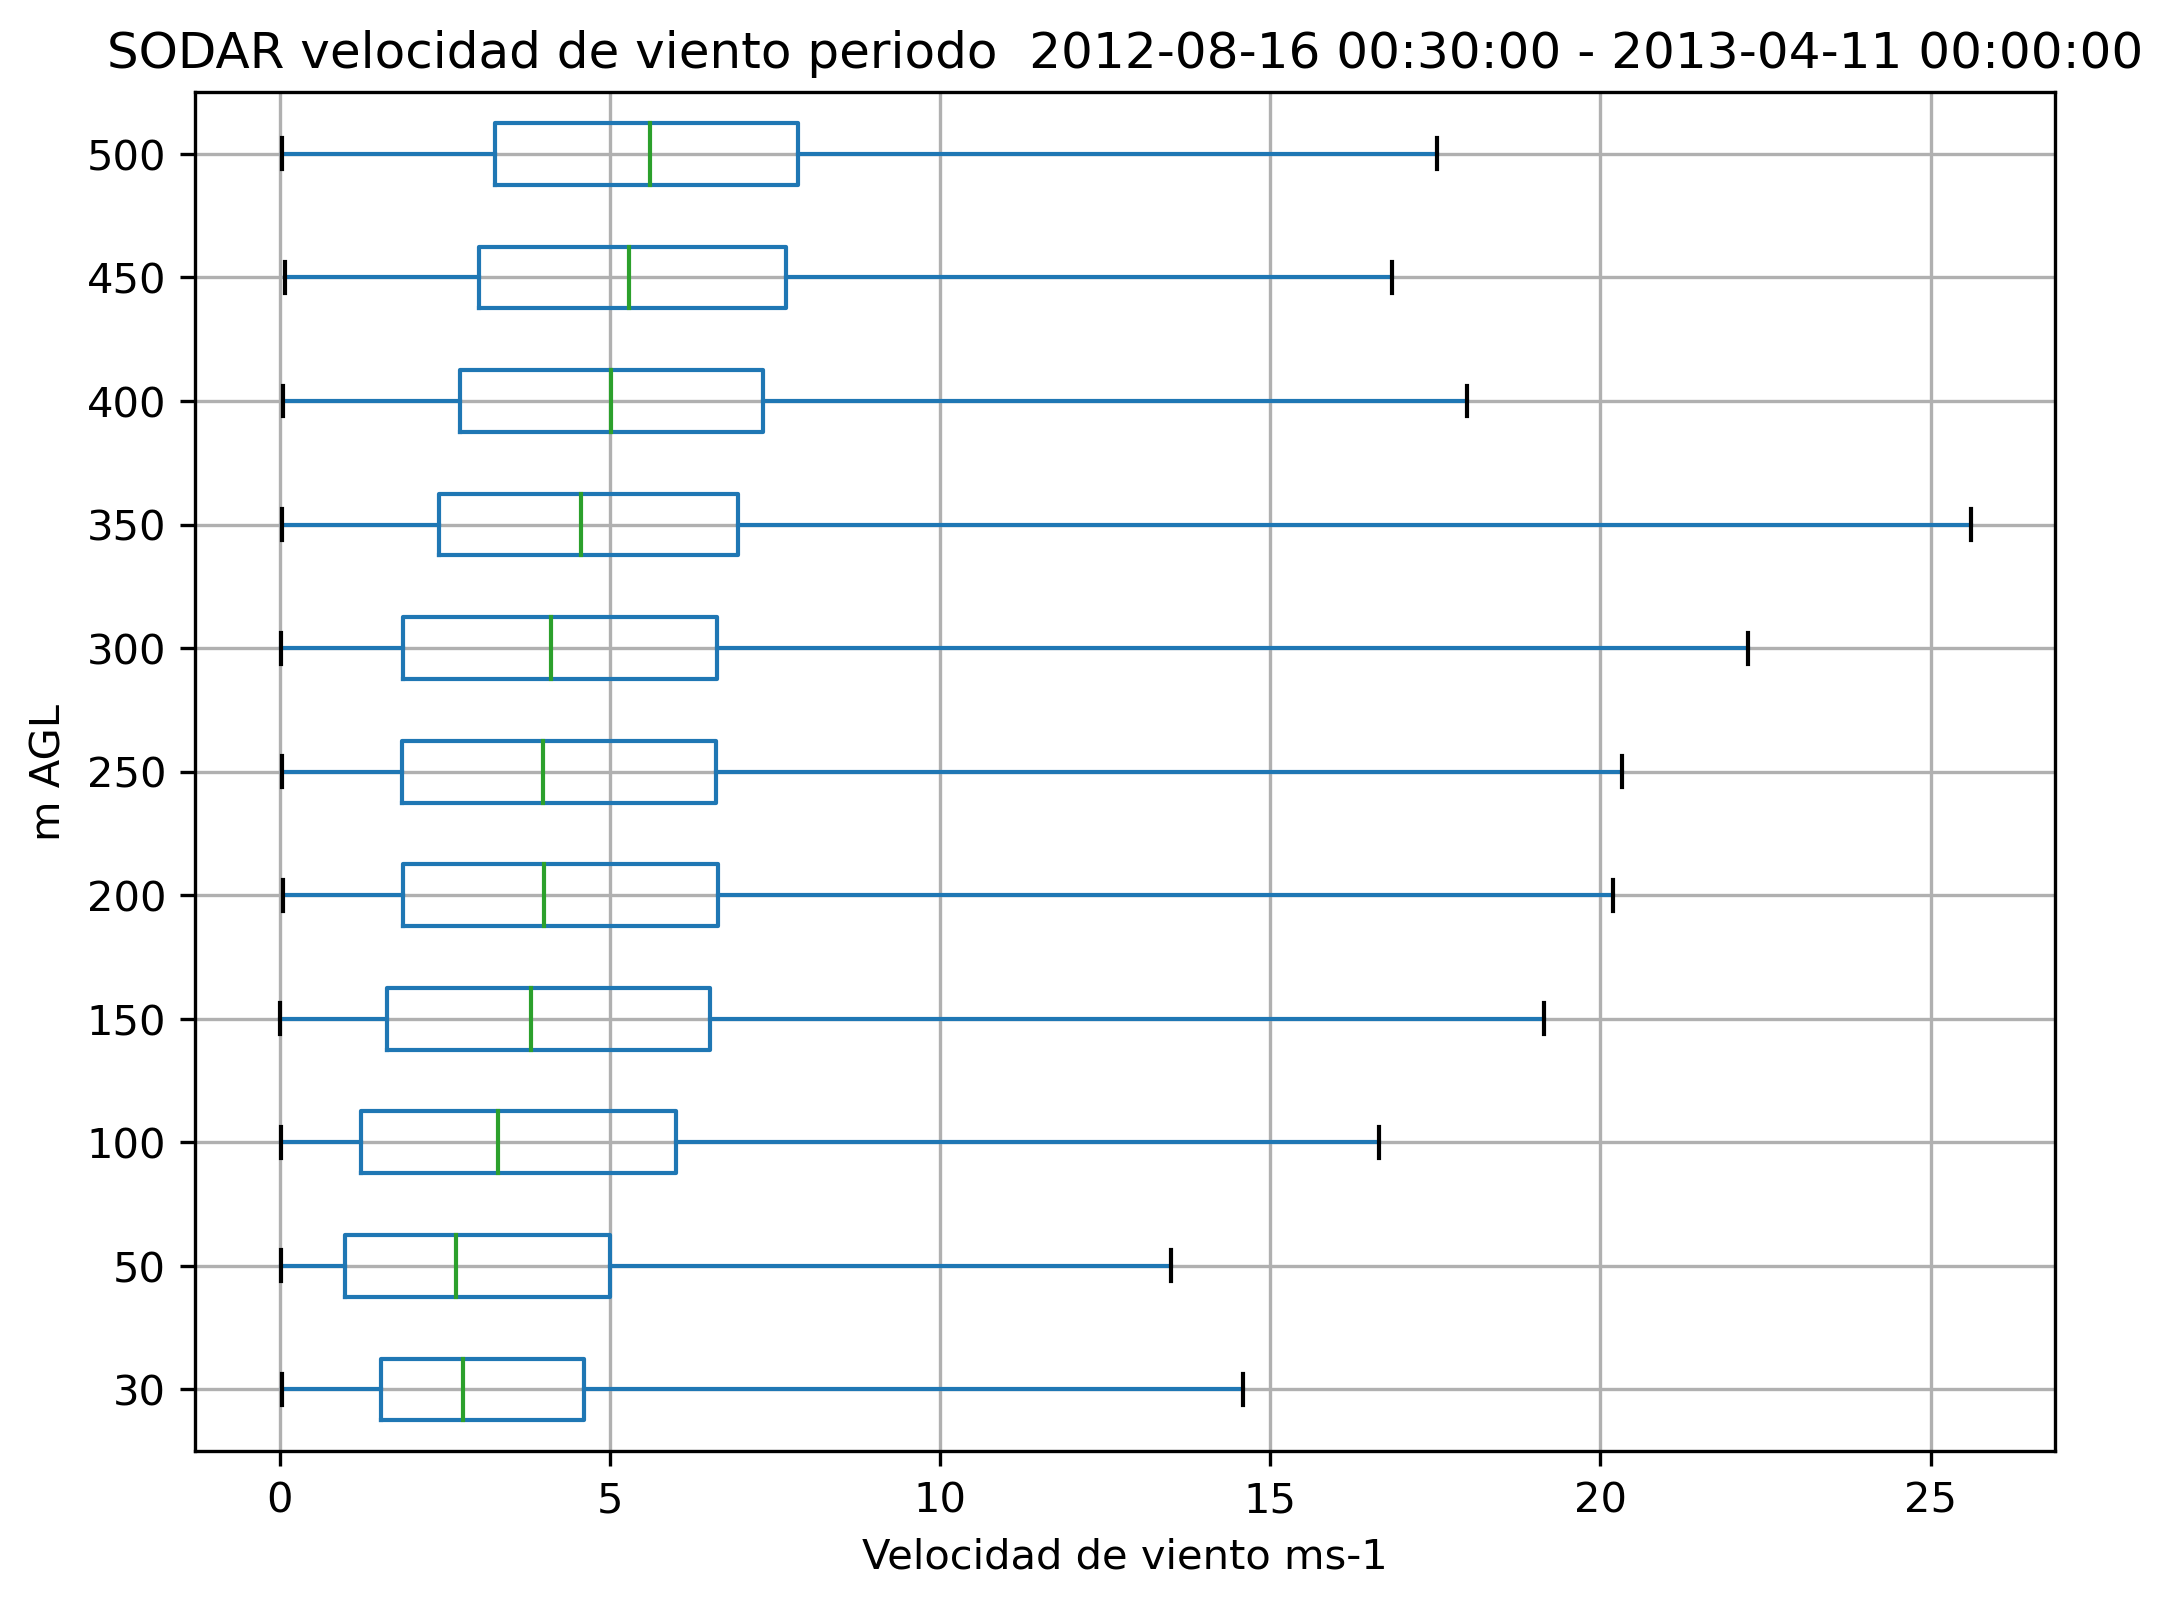

In [84]:
fig = plt.figure(figsize=[8,6])
list=np.append([30], np.arange(50,501,50))
idx = (list-30)/10
spb = sp.iloc[:,idx]
spb.boxplot(vert=False, whis=[0, 100])
plt.xticks()

plt.yticks(np.arange(1, 12, 1), list);
plt.ylabel('m AGL')
plt.xlabel('Velocidad de viento ms-1')
plt.title('SODAR velocidad de viento periodo  '+str(dd.index[0])+' - '+str(dd.index[11423]))
plt.savefig('exp5_Boxplot.png', dpi=300)

In [85]:
spb.describe().to_csv("/Dropbox/Doctorado/_Tesis Doctorado/my_description.csv")

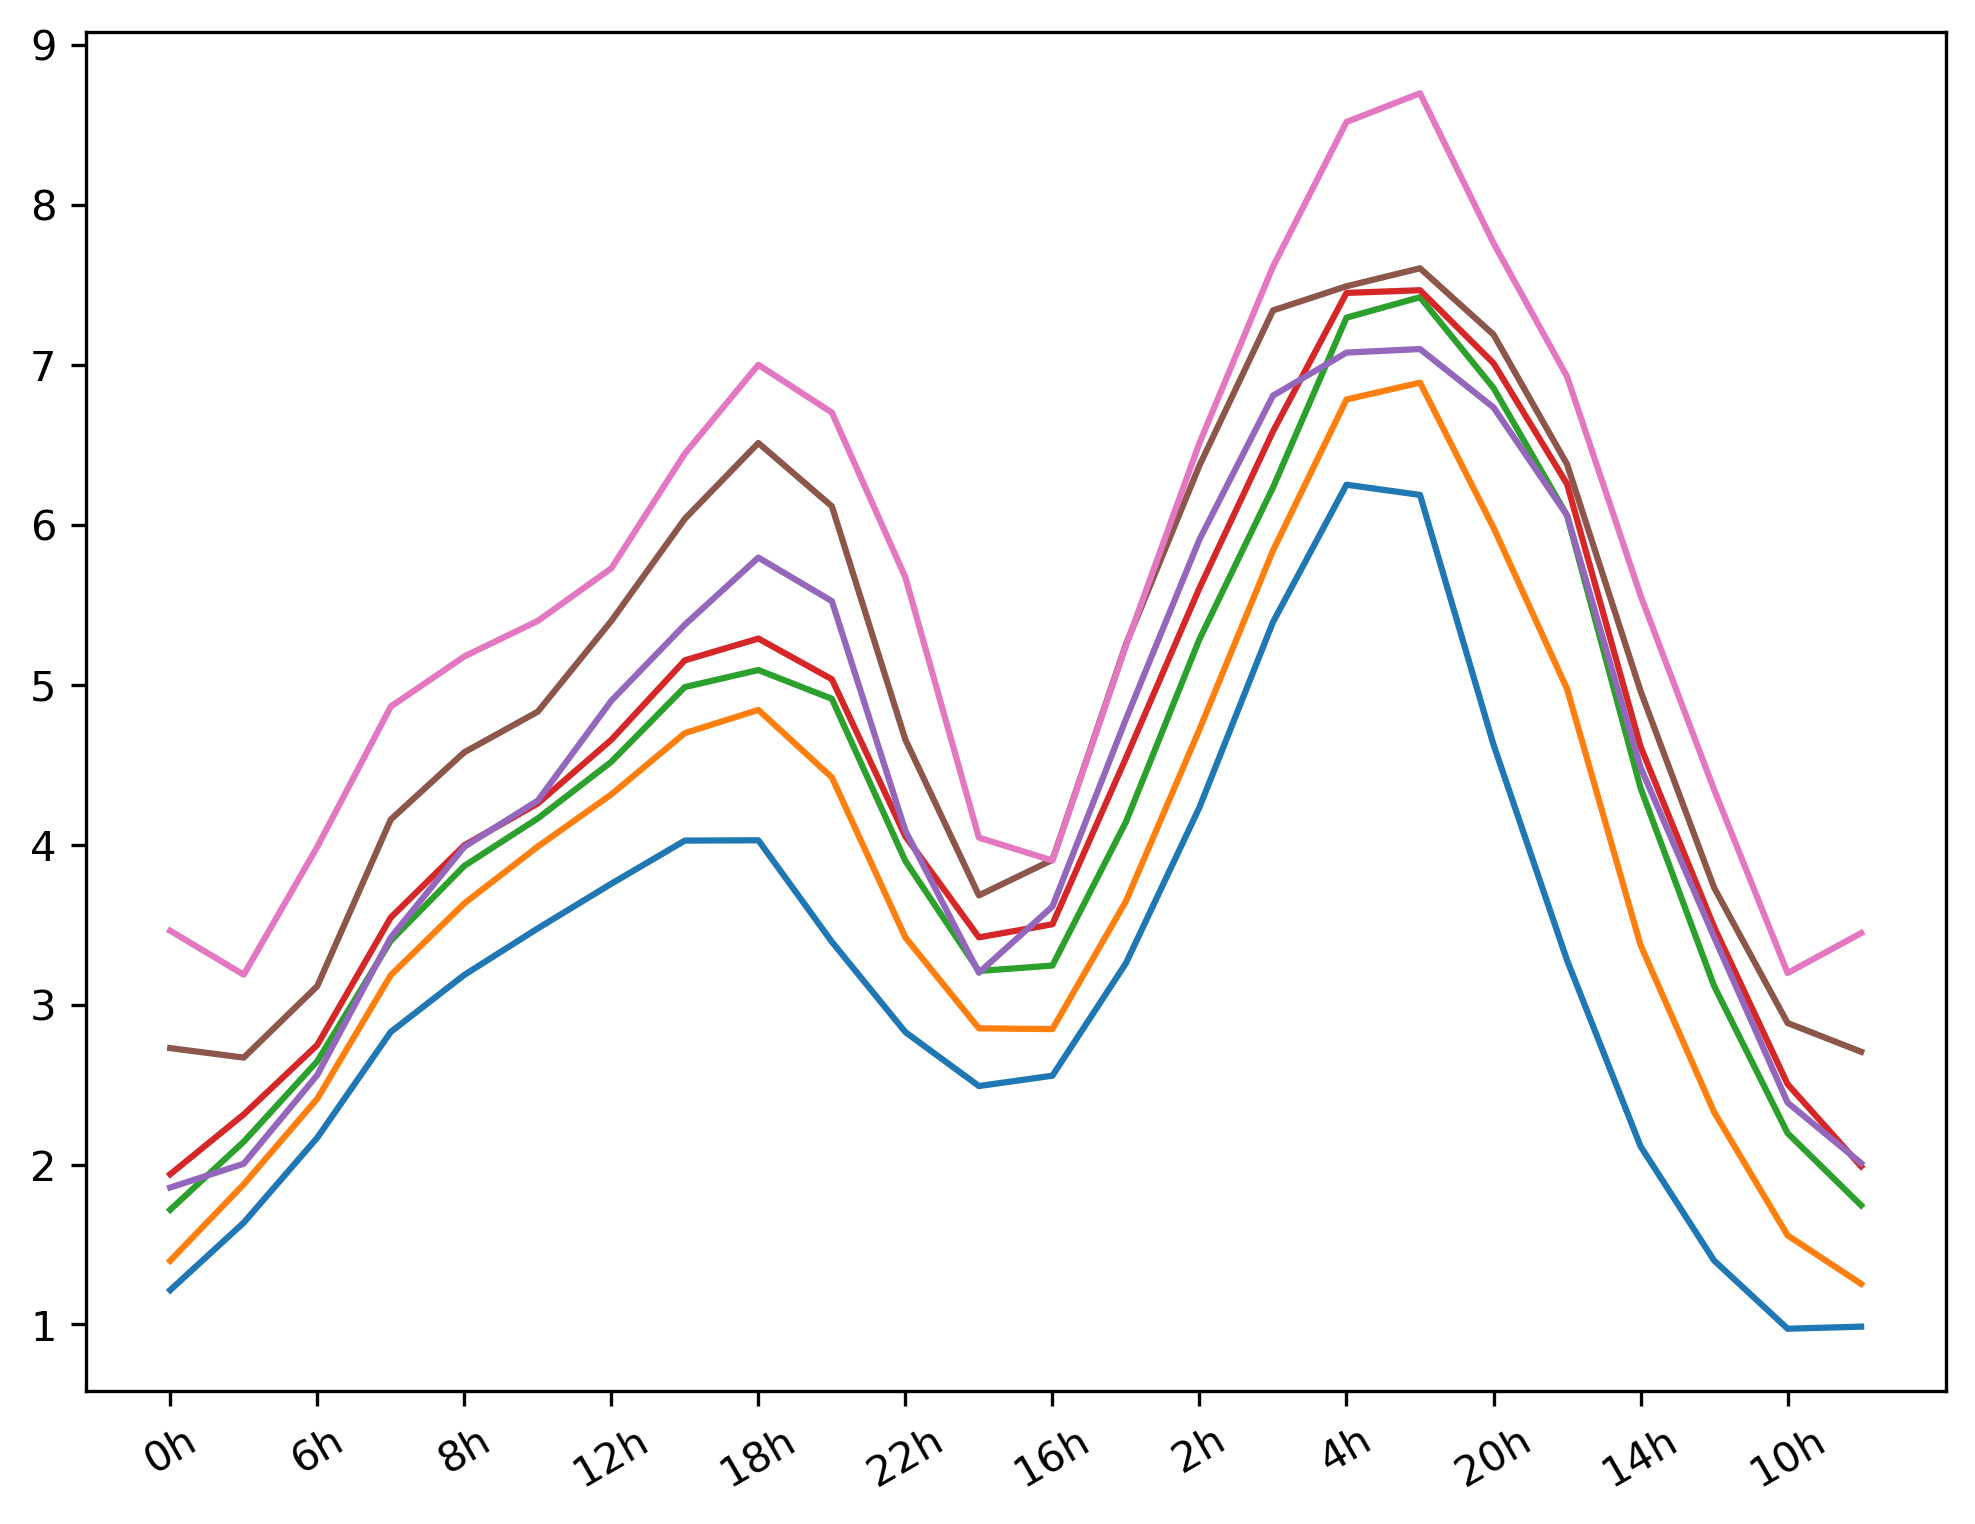

In [86]:
fig = plt.figure(figsize=[8,6])
sp50 =  sp['spd_50']
sp100 = sp['spd_100']
sp150 = sp['spd_150']
sp200 = sp['spd_200']
sp250 = sp['spd_250']
sp300 = sp['spd_300']
sp350 = sp['spd_350']
sp400 = sp['spd_400']
sp450 = sp['spd_450']
sp500 = sp['spd_500']
s50h = sp50.groupby(sp50.index.hour).mean()
s100h = sp100.groupby(sp100.index.hour).mean()
s150h = sp150.groupby(sp150.index.hour).mean()
s200h = sp200.groupby(sp200.index.hour).mean()
s300h = sp300.groupby(sp300.index.hour).mean()
s400h = sp400.groupby(sp400.index.hour).mean()
s500h = sp500.groupby(sp500.index.hour).mean()
plt.plot(s50h)
plt.plot(s100h)
plt.plot(s150h)
plt.plot(s200h)
plt.plot(s300h)
plt.plot(s400h)
plt.plot(s500h)


xloc, xindex = np.arange(0,23,2), {'0h', '2h', '4h', '6h', '8h', '10h', '12h', '14h', '16h', '18h', '20h', '22h' }
plt.xticks(xloc, xindex, rotation=30)
plt.savefig('exp5_Boxplot.png', dpi=300)

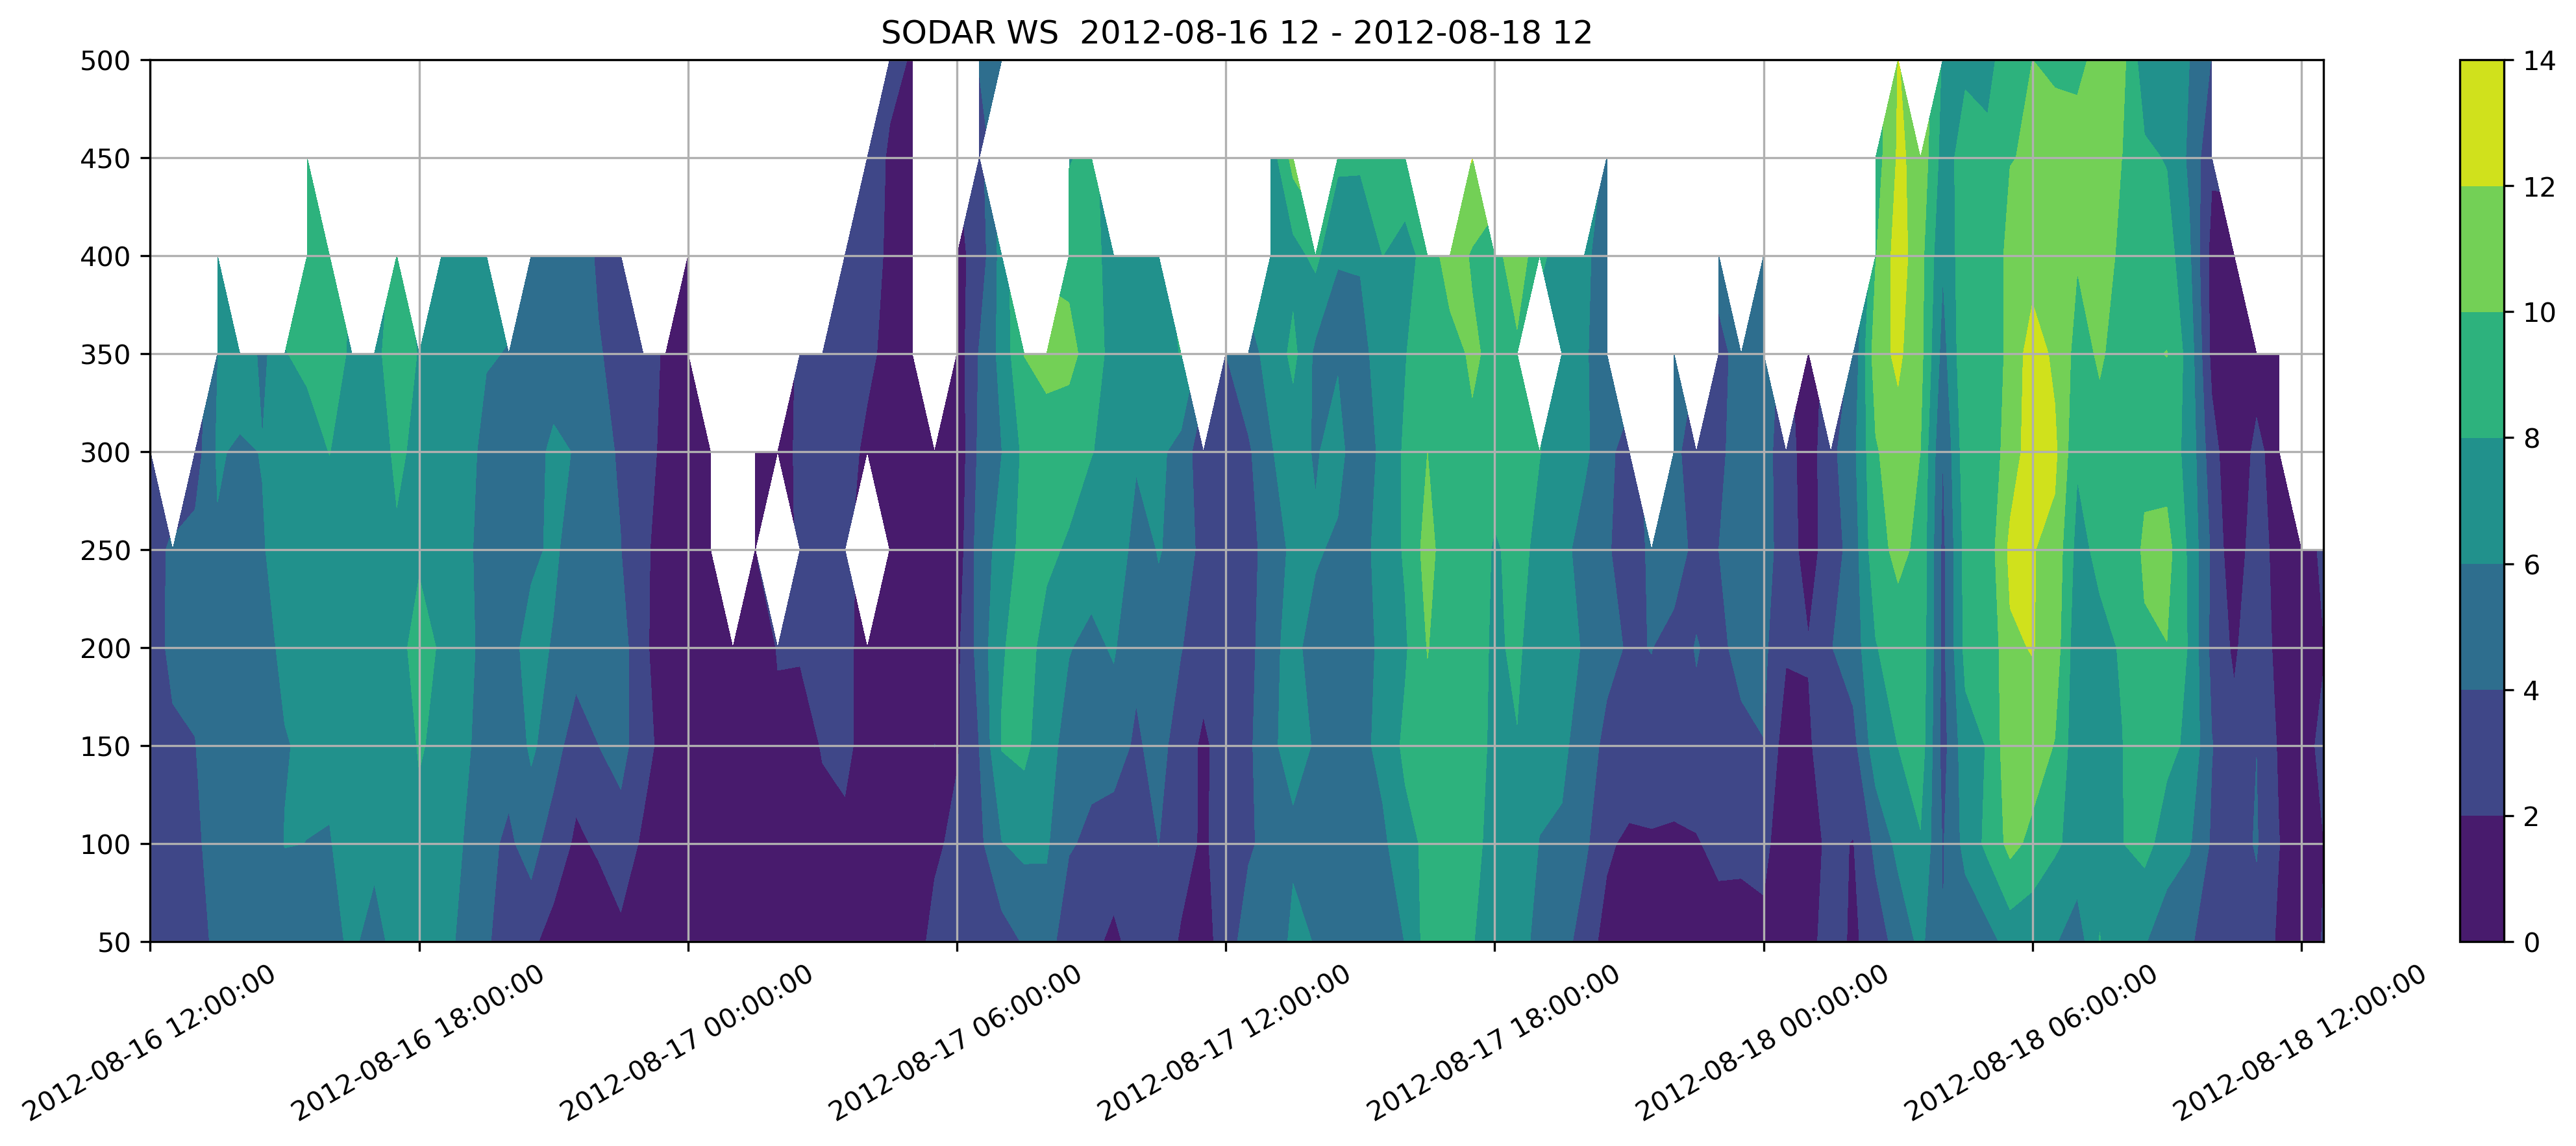

In [87]:
plt.figure(figsize=(18,6))
date1, date2 = '2012-08-16 12', '2012-08-18 12'
sp_vert =  pd.DataFrame([sp['spd_50'][date1:date2], sp['spd_100'][date1:date2], sp['spd_150'][date1:date2],
            sp['spd_200'][date1:date2], sp['spd_250'][date1:date2], sp['spd_300'][date1:date2],
            sp['spd_350'][date1:date2], sp['spd_400'][date1:date2], sp['spd_450'][date1:date2],
            sp['spd_500'][date1:date2]])
cont = plt.contourf(sp_vert)
plt.colorbar(cont)
plt.yticks(np.arange(10), np.arange(50,501,50));
xdelta = 12
xloc, xindex = np.arange(0,sp_vert.shape[1],xdelta), sp['spd_50'][date1:date2][::xdelta].index
plt.xticks(xloc, xindex, rotation=30)

plt.title('SODAR WS  '+str(date1)+' - '+str(date2))
plt.grid(True)

figname='SODAR_ts_WS_'
#plt.savefig(dirs+figname+'_'+rtimes+'_'+run+'.png', dpi=300)

98


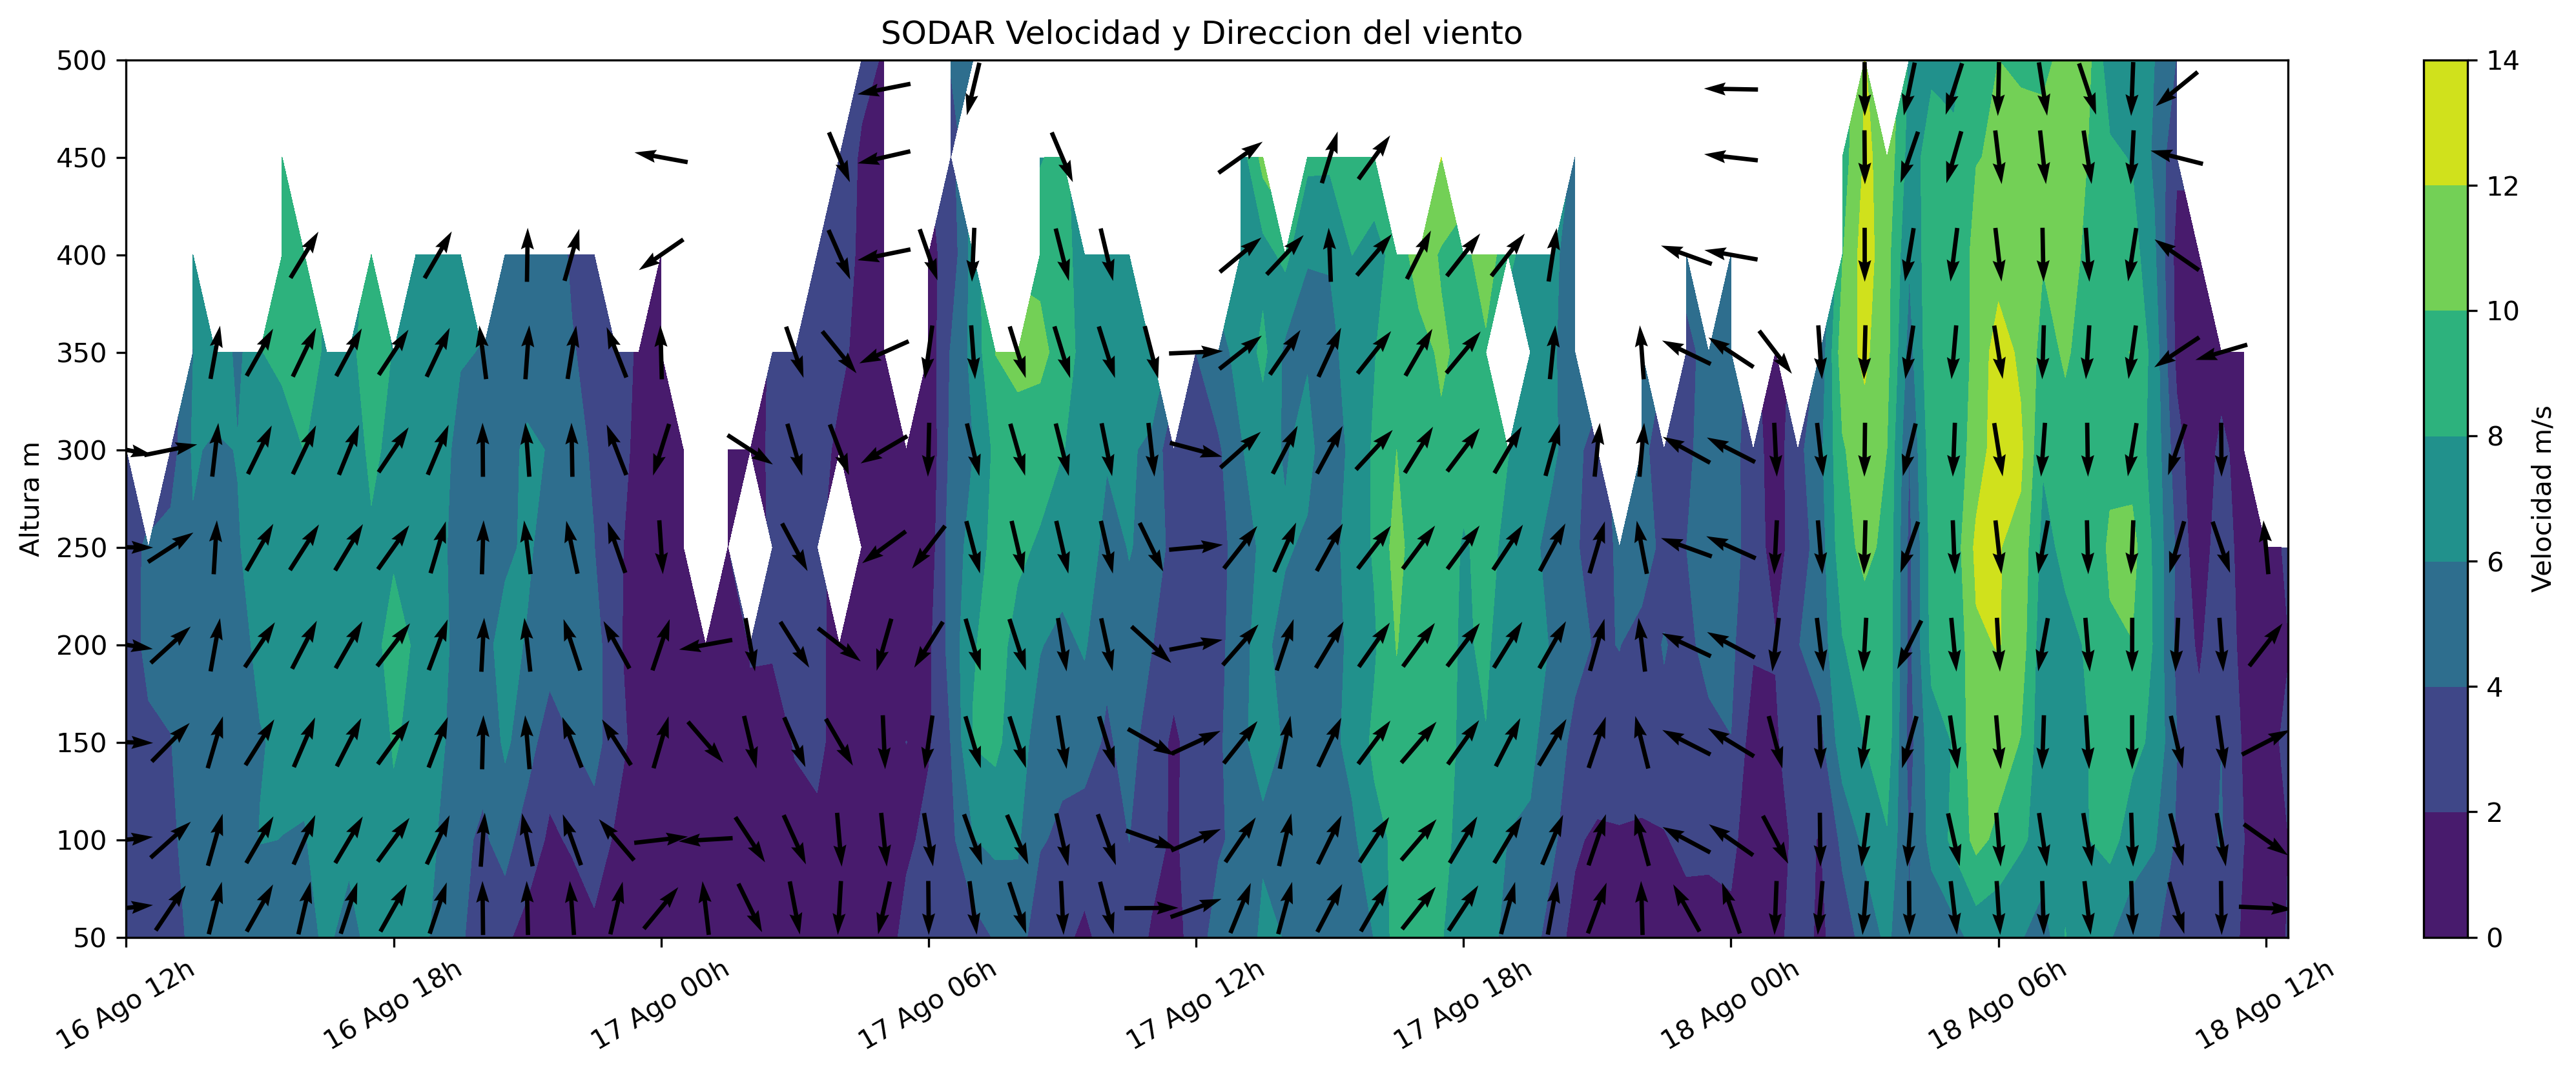

In [88]:
fig = plt.figure(figsize=[18,6])
date1, date2 = '2012-08-16 12', '2012-08-18 12'
s50, d50 = sp50[date1:date2], np.radians(dd['spd_50'][date1:date2]+180)
d50hu, d50hv = np.sin(d50), np.cos(d50)
s100, d100 = sp100[date1:date2], np.radians(dd['spd_100'][date1:date2]+180)
d100hu, d100hv = np.sin(d100), np.cos(d100)
s150, d150 = sp150[date1:date2], np.radians(dd['spd_150'][date1:date2]+180)
d150hu, d150hv = np.sin(d150), np.cos(d150)
s200, d200 = sp200[date1:date2], np.radians(dd['spd_200'][date1:date2]+180)
d200hu, d200hv = np.sin(d200), np.cos(d200)
s250, d250 = sp250[date1:date2], np.radians(dd['spd_250'][date1:date2]+180)
d250hu, d250hv = np.sin(d250), np.cos(d250)
s300, d300 = sp300[date1:date2], np.radians(dd['spd_300'][date1:date2]+180)
d300hu, d300hv = np.sin(d300), np.cos(d300)
s350, d350 = sp350[date1:date2], np.radians(dd['spd_350'][date1:date2]+180)
d350hu, d350hv = np.sin(d350), np.cos(d350)
s400, d400 = sp400[date1:date2], np.radians(dd['spd_400'][date1:date2]+180)
d400hu, d400hv = np.sin(d400), np.cos(d400)
s450, d450 = sp450[date1:date2], np.radians(dd['spd_450'][date1:date2]+180)
d450hu, d450hv = np.sin(d450), np.cos(d450)
s500, d500 = sp500[date1:date2], np.radians(dd['spd_500'][date1:date2]+180)
d500hu, d500hv = np.sin(d500), np.cos(d500)
nx = s50.size
print(nx)
cont = plt.contourf(np.arange(nx), [50, 100, 150, 200, 250, 300, 350, 400, 450, 500], 
                    [s50[:nx], s100[:nx], s150[:nx], s200[:nx], s250[:nx], s300[:nx],
                     s350[:nx], s400[:nx], s450[:nx], s500[:nx]])
cbar = plt.colorbar(cont)
cbar.ax.set_ylabel('Velocidad m/s')
plt.ylabel('Altura m')
xdelta = 2
width = 0.002
scale = 40
xloc = np.arange(nx)[::xdelta]
plt.quiver(xloc, 65,  d50hu[::xdelta],  d50hv[::xdelta], pivot='middle', width=width, scale=scale)
plt.quiver(xloc, 100, d100hu[::xdelta], d100hv[::xdelta], pivot='middle', width=width, scale=scale)
plt.quiver(xloc, 150, d150hu[::xdelta], d150hv[::xdelta], pivot='middle', width=width, scale=scale)
plt.quiver(xloc, 200, d200hu[::xdelta], d200hv[::xdelta], pivot='middle', width=width, scale=scale)
plt.quiver(xloc, 250, d250hu[::xdelta], d250hv[::xdelta], pivot='middle', width=width, scale=scale)
plt.quiver(xloc, 300, d300hu[::xdelta], d300hv[::xdelta], pivot='middle', width=width, scale=scale)
plt.quiver(xloc, 350, d350hu[::xdelta], d350hv[::xdelta], pivot='middle', width=width, scale=scale)
plt.quiver(xloc, 400, d400hu[::xdelta], d400hv[::xdelta], pivot='middle', width=width, scale=scale)
plt.quiver(xloc, 450, d450hu[::xdelta], d450hv[::xdelta], pivot='middle', width=width, scale=scale)
plt.quiver(xloc, 485, d500hu[::xdelta], d500hv[::xdelta], pivot='middle', width=width, scale=scale)

xdelta = 12
plt.xticks(np.arange(nx)[::xdelta], s50[::xdelta].index.strftime('%d Ago %Hh'), rotation=30);
#plt.title('SODAR Wind Speed (Contours) and Horizontal Flow Field (Arrows) ');
plt.title('SODAR Velocidad y Direccion del viento ');

In [89]:

s50[::xdelta*2].index.strftime('%d %b %Hh').tolist()

['16 ago. 12h', '17 ago. 00h', '17 ago. 12h', '18 ago. 00h', '18 ago. 12h']

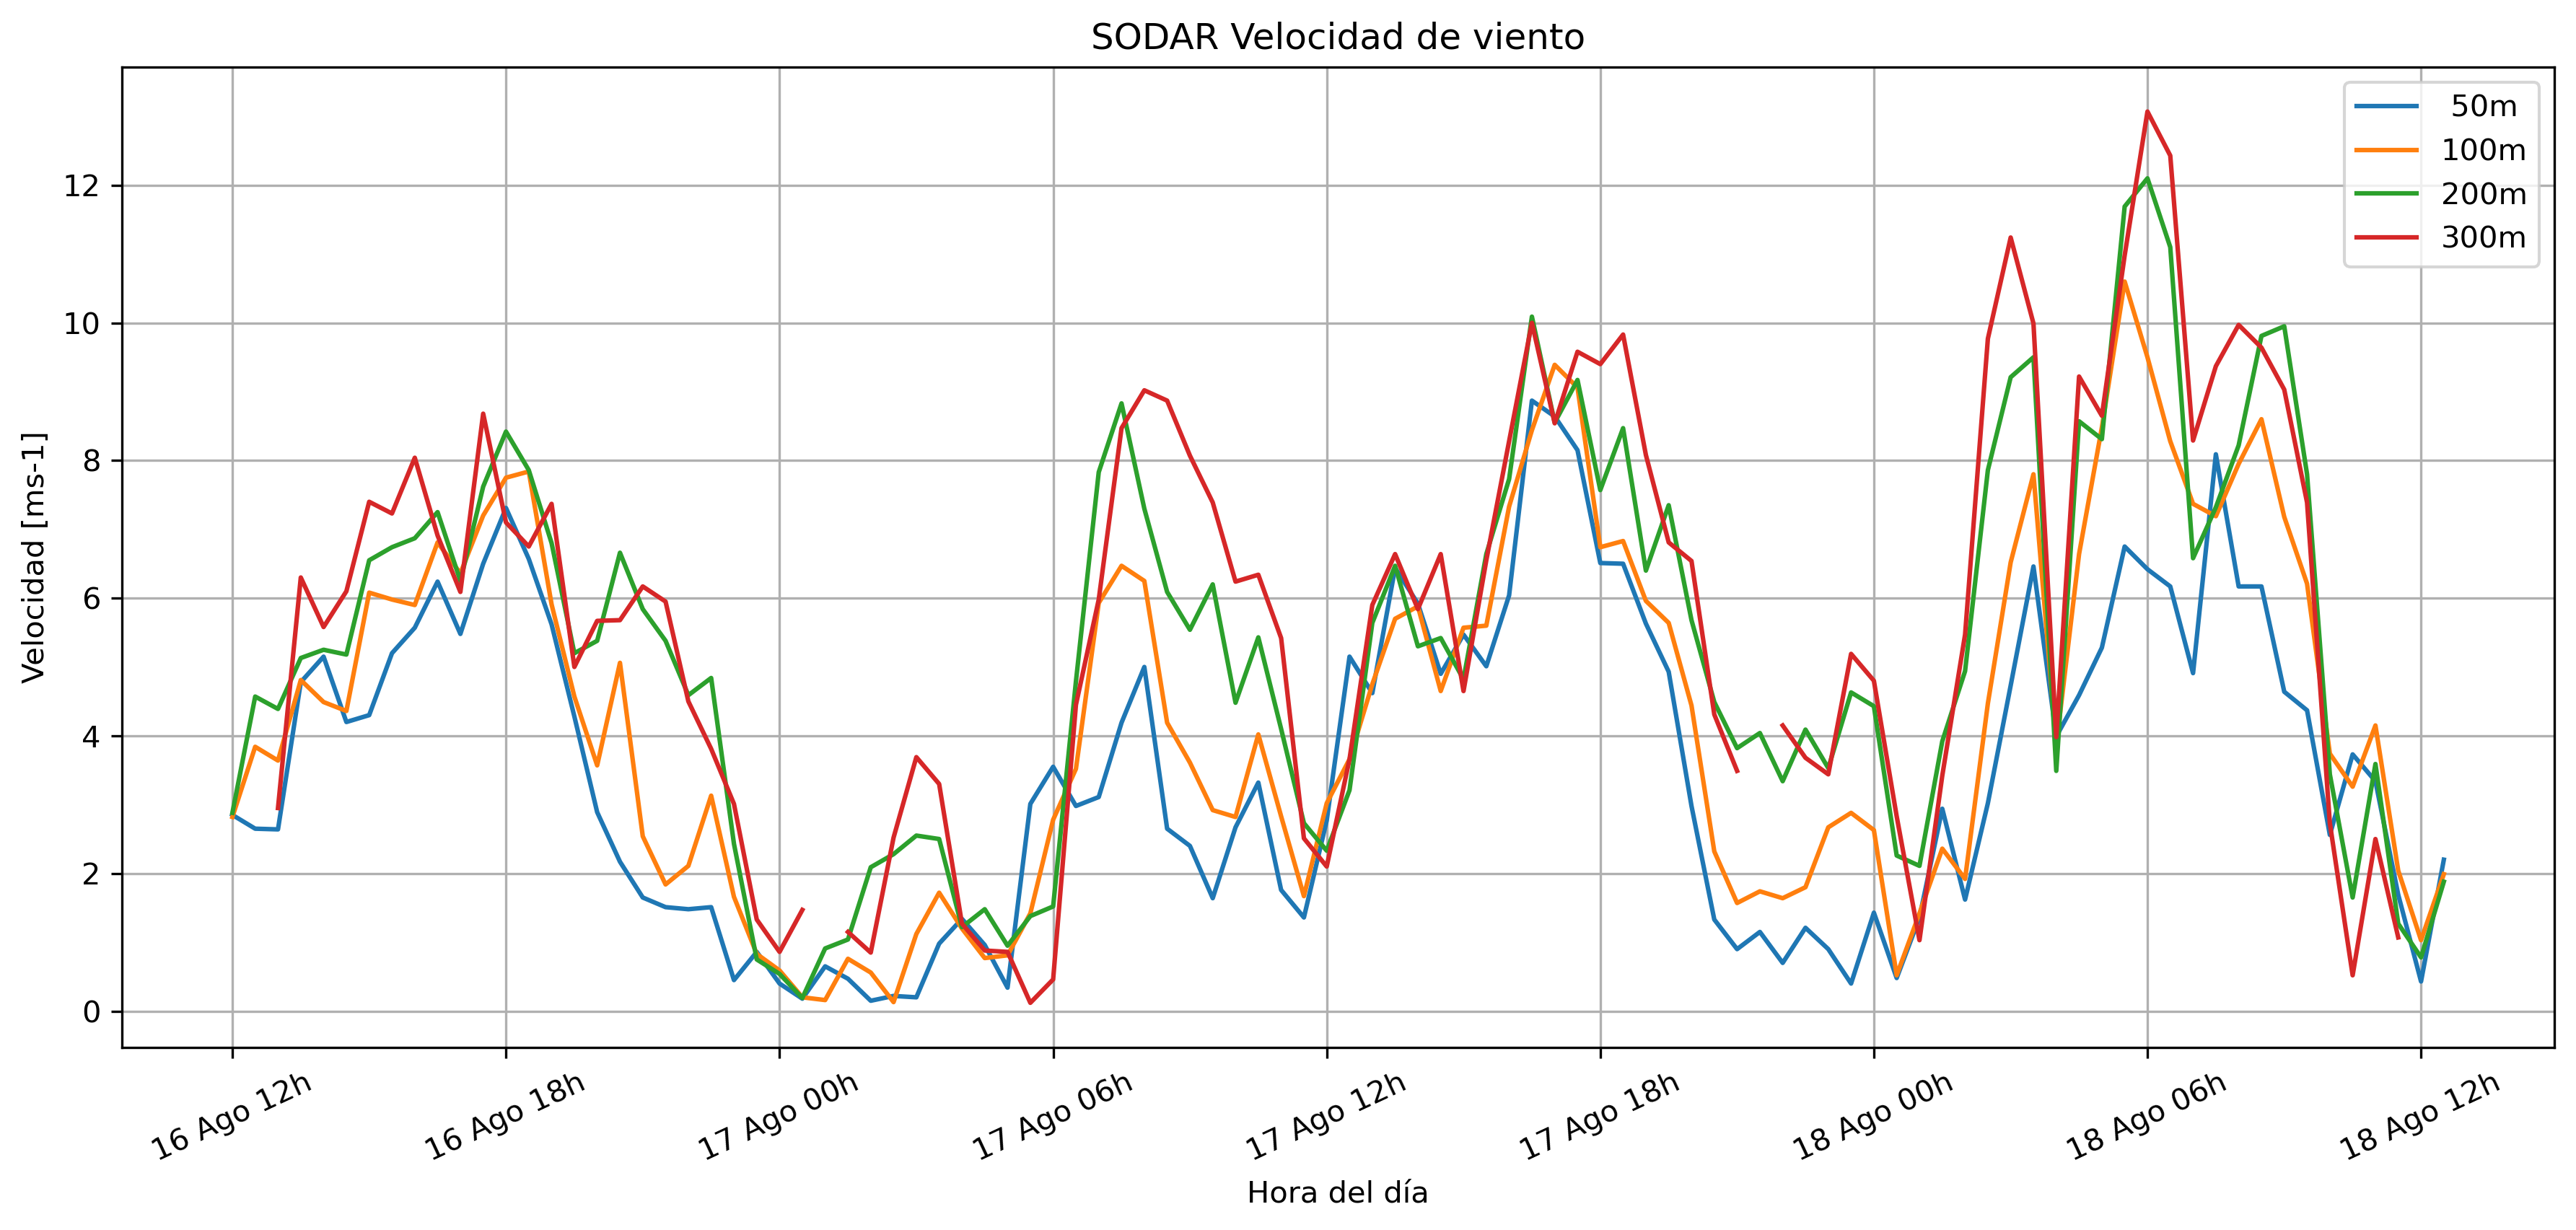

In [90]:
import locale
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

fig = plt.figure(figsize=[14.5,6])
s100 = sp['spd_50'][date1:date2]
s100 = sp['spd_100'][date1:date2]
s200 = sp['spd_200'][date1:date2]
s300 = sp['spd_300'][date1:date2]

nx = s50.size
xdelta = 6
xloc = np.arange(nx)
tickname = s50[::xdelta*2].index.strftime('%d Ago %Hh').tolist()
plt.xticks(np.arange(nx)[::xdelta*2], tickname, rotation=25);
plt.plot(xloc, s50, label=' 50m')
plt.plot(xloc, s100, label='100m')
plt.plot(xloc, s200, label='200m')
plt.plot(xloc, s300, label='300m')

plt.ylabel('Velocidad [ms-1]')
plt.xlabel('Hora del día')
plt.grid(True)
plt.legend()

plt.title('SODAR Velocidad de viento')
figname='wrf_spd_'
#plt.savefig(dirs+figname+'_'+rtimes+'_'+run+'.png', dpi=300)
plt.show()

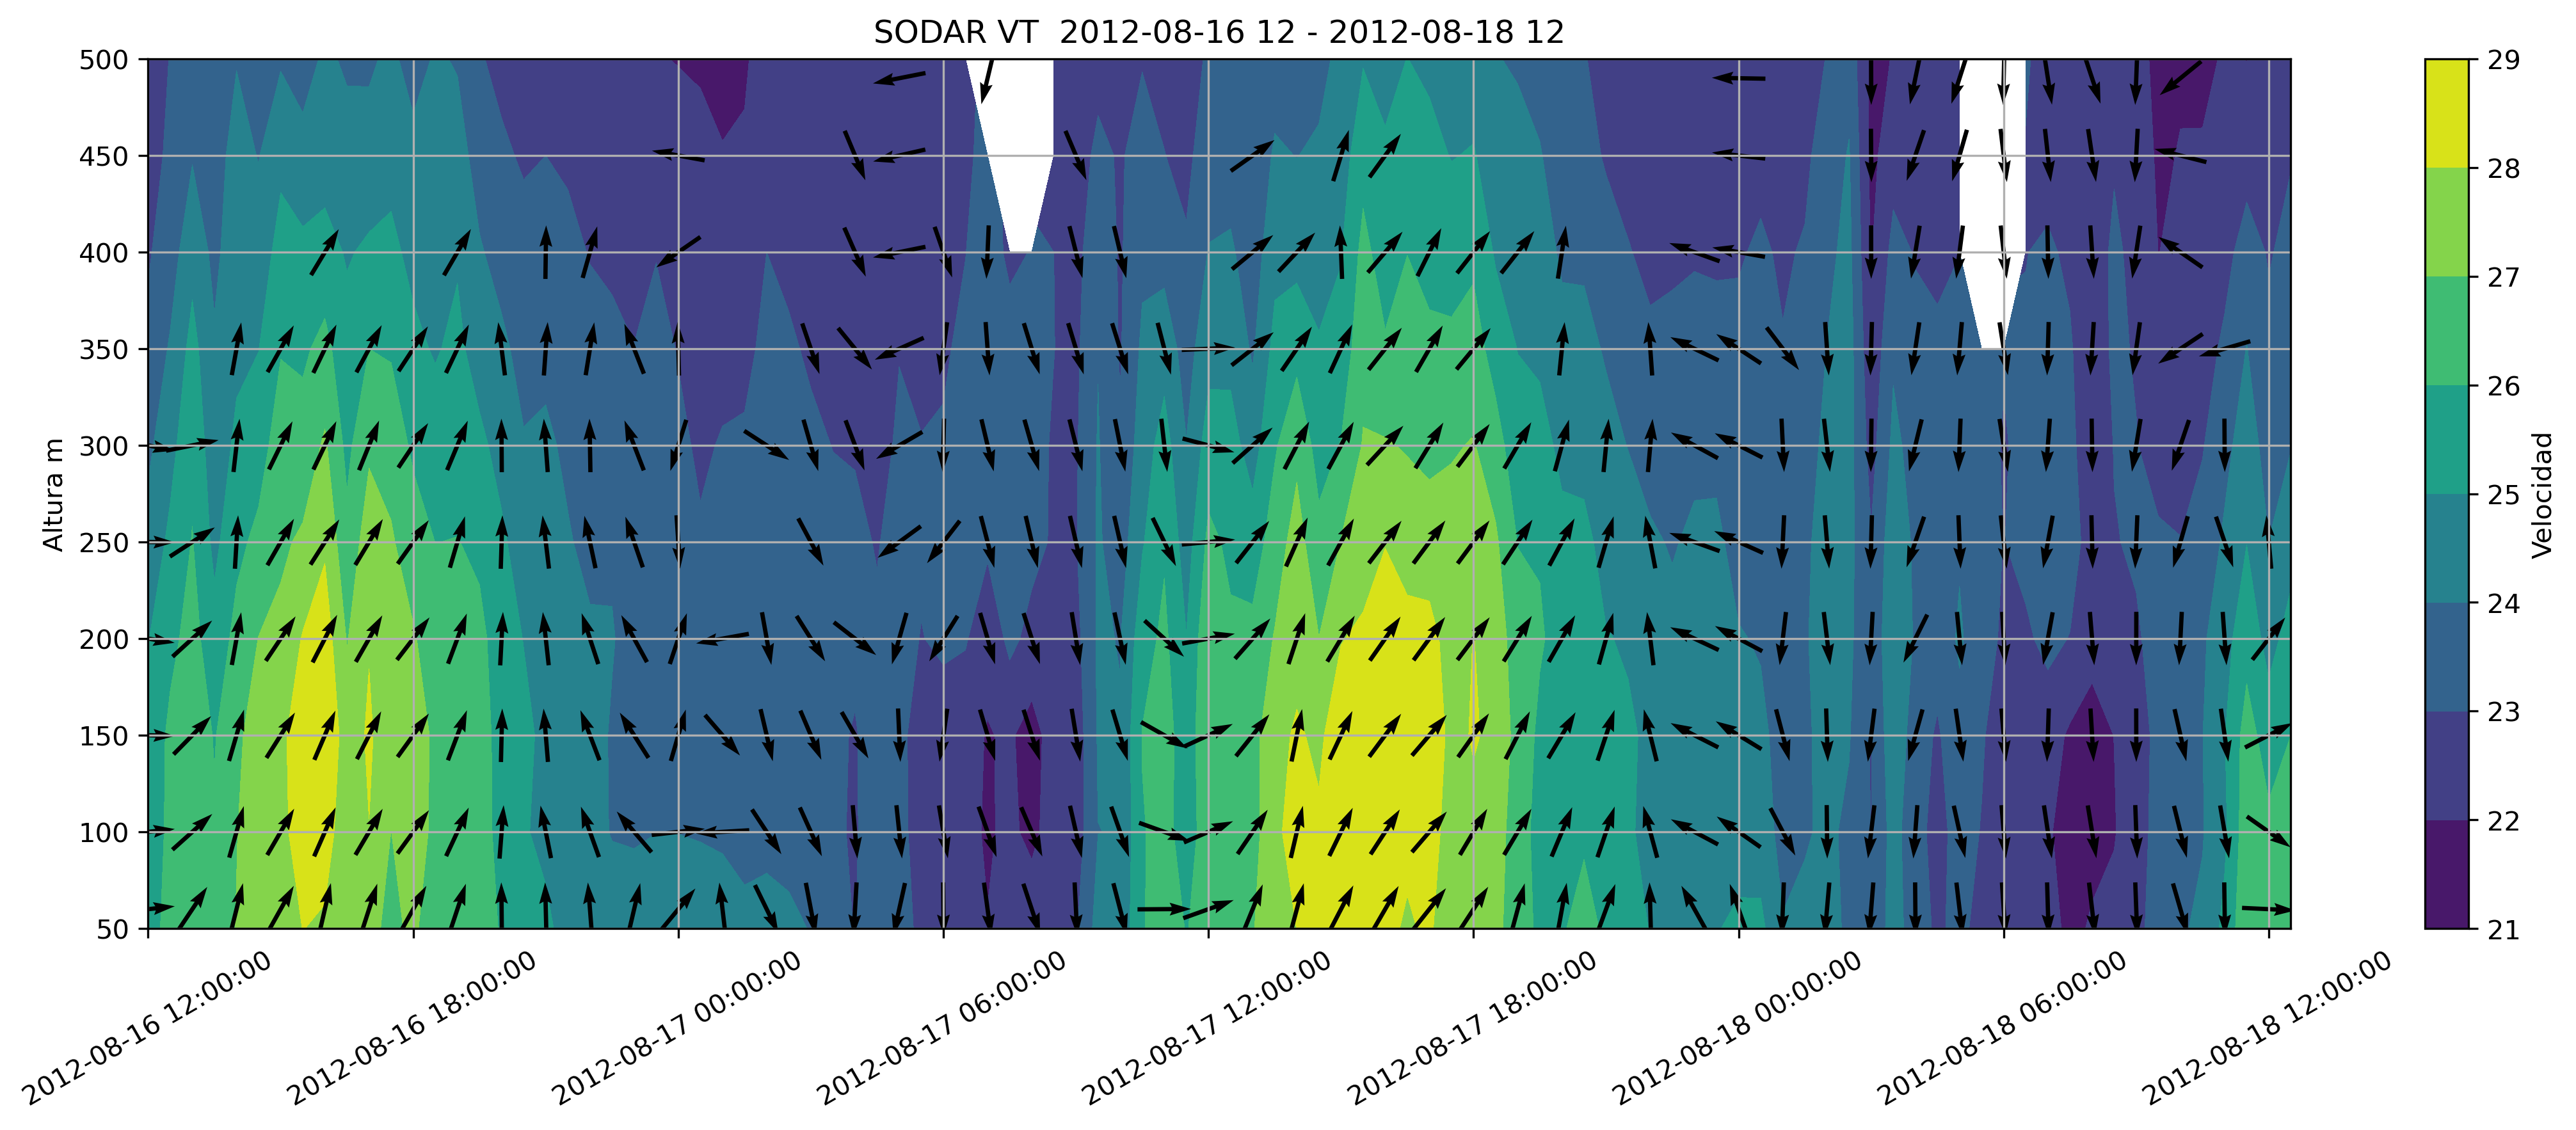

In [91]:
plt.figure(figsize=(18,6))
tv_vert =  pd.DataFrame([tv['spd_50'][date1:date2], tv['spd_100'][date1:date2], tv['spd_150'][date1:date2],
            tv['spd_200'][date1:date2], tv['spd_250'][date1:date2], tv['spd_300'][date1:date2],
            tv['spd_350'][date1:date2], tv['spd_400'][date1:date2], tv['spd_450'][date1:date2],
            tv['spd_500'][date1:date2]])

cont = plt.contourf(tv_vert)
cbar = plt.colorbar(cont)
cbar.ax.set_ylabel('Velocidad')
plt.yticks(np.arange(10), np.arange(50,501,50));
xdelta = 12
xloc, xindex = np.arange(0,tv_vert.shape[1],xdelta), sp['spd_50'][date1:date2][::xdelta].index
plt.xticks(xloc, xindex, rotation=30)
plt.ylabel('Altura m')

xdelta = 2
width = 0.002
scale = 40
xloc = np.arange(nx)[::xdelta]
plt.quiver(xloc, .2, d50hu[::xdelta], d50hv[::xdelta], pivot='middle', width=width, scale=scale)
plt.quiver(xloc, 1, d100hu[::xdelta], d100hv[::xdelta], pivot='middle', width=width, scale=scale)
plt.quiver(xloc, 2, d150hu[::xdelta], d150hv[::xdelta], pivot='middle', width=width, scale=scale)
plt.quiver(xloc, 3, d200hu[::xdelta], d200hv[::xdelta], pivot='middle', width=width, scale=scale)
plt.quiver(xloc, 4, d250hu[::xdelta], d250hv[::xdelta], pivot='middle', width=width, scale=scale)
plt.quiver(xloc, 5, d300hu[::xdelta], d300hv[::xdelta], pivot='middle', width=width, scale=scale)
plt.quiver(xloc, 6, d350hu[::xdelta], d350hv[::xdelta], pivot='middle', width=width, scale=scale)
plt.quiver(xloc, 7, d400hu[::xdelta], d400hv[::xdelta], pivot='middle', width=width, scale=scale)
plt.quiver(xloc, 8, d450hu[::xdelta], d450hv[::xdelta], pivot='middle', width=width, scale=scale)
plt.quiver(xloc, 8.8, d500hu[::xdelta], d500hv[::xdelta], pivot='middle', width=width, scale=scale)
plt.title('SODAR VT  '+str(date1)+' - '+str(date2))
plt.grid(True)

figname='WRF_ts_TV_'
#plt.savefig(dirs+figname+'_'+rtimes+'_'+run+'.png', dpi=300)

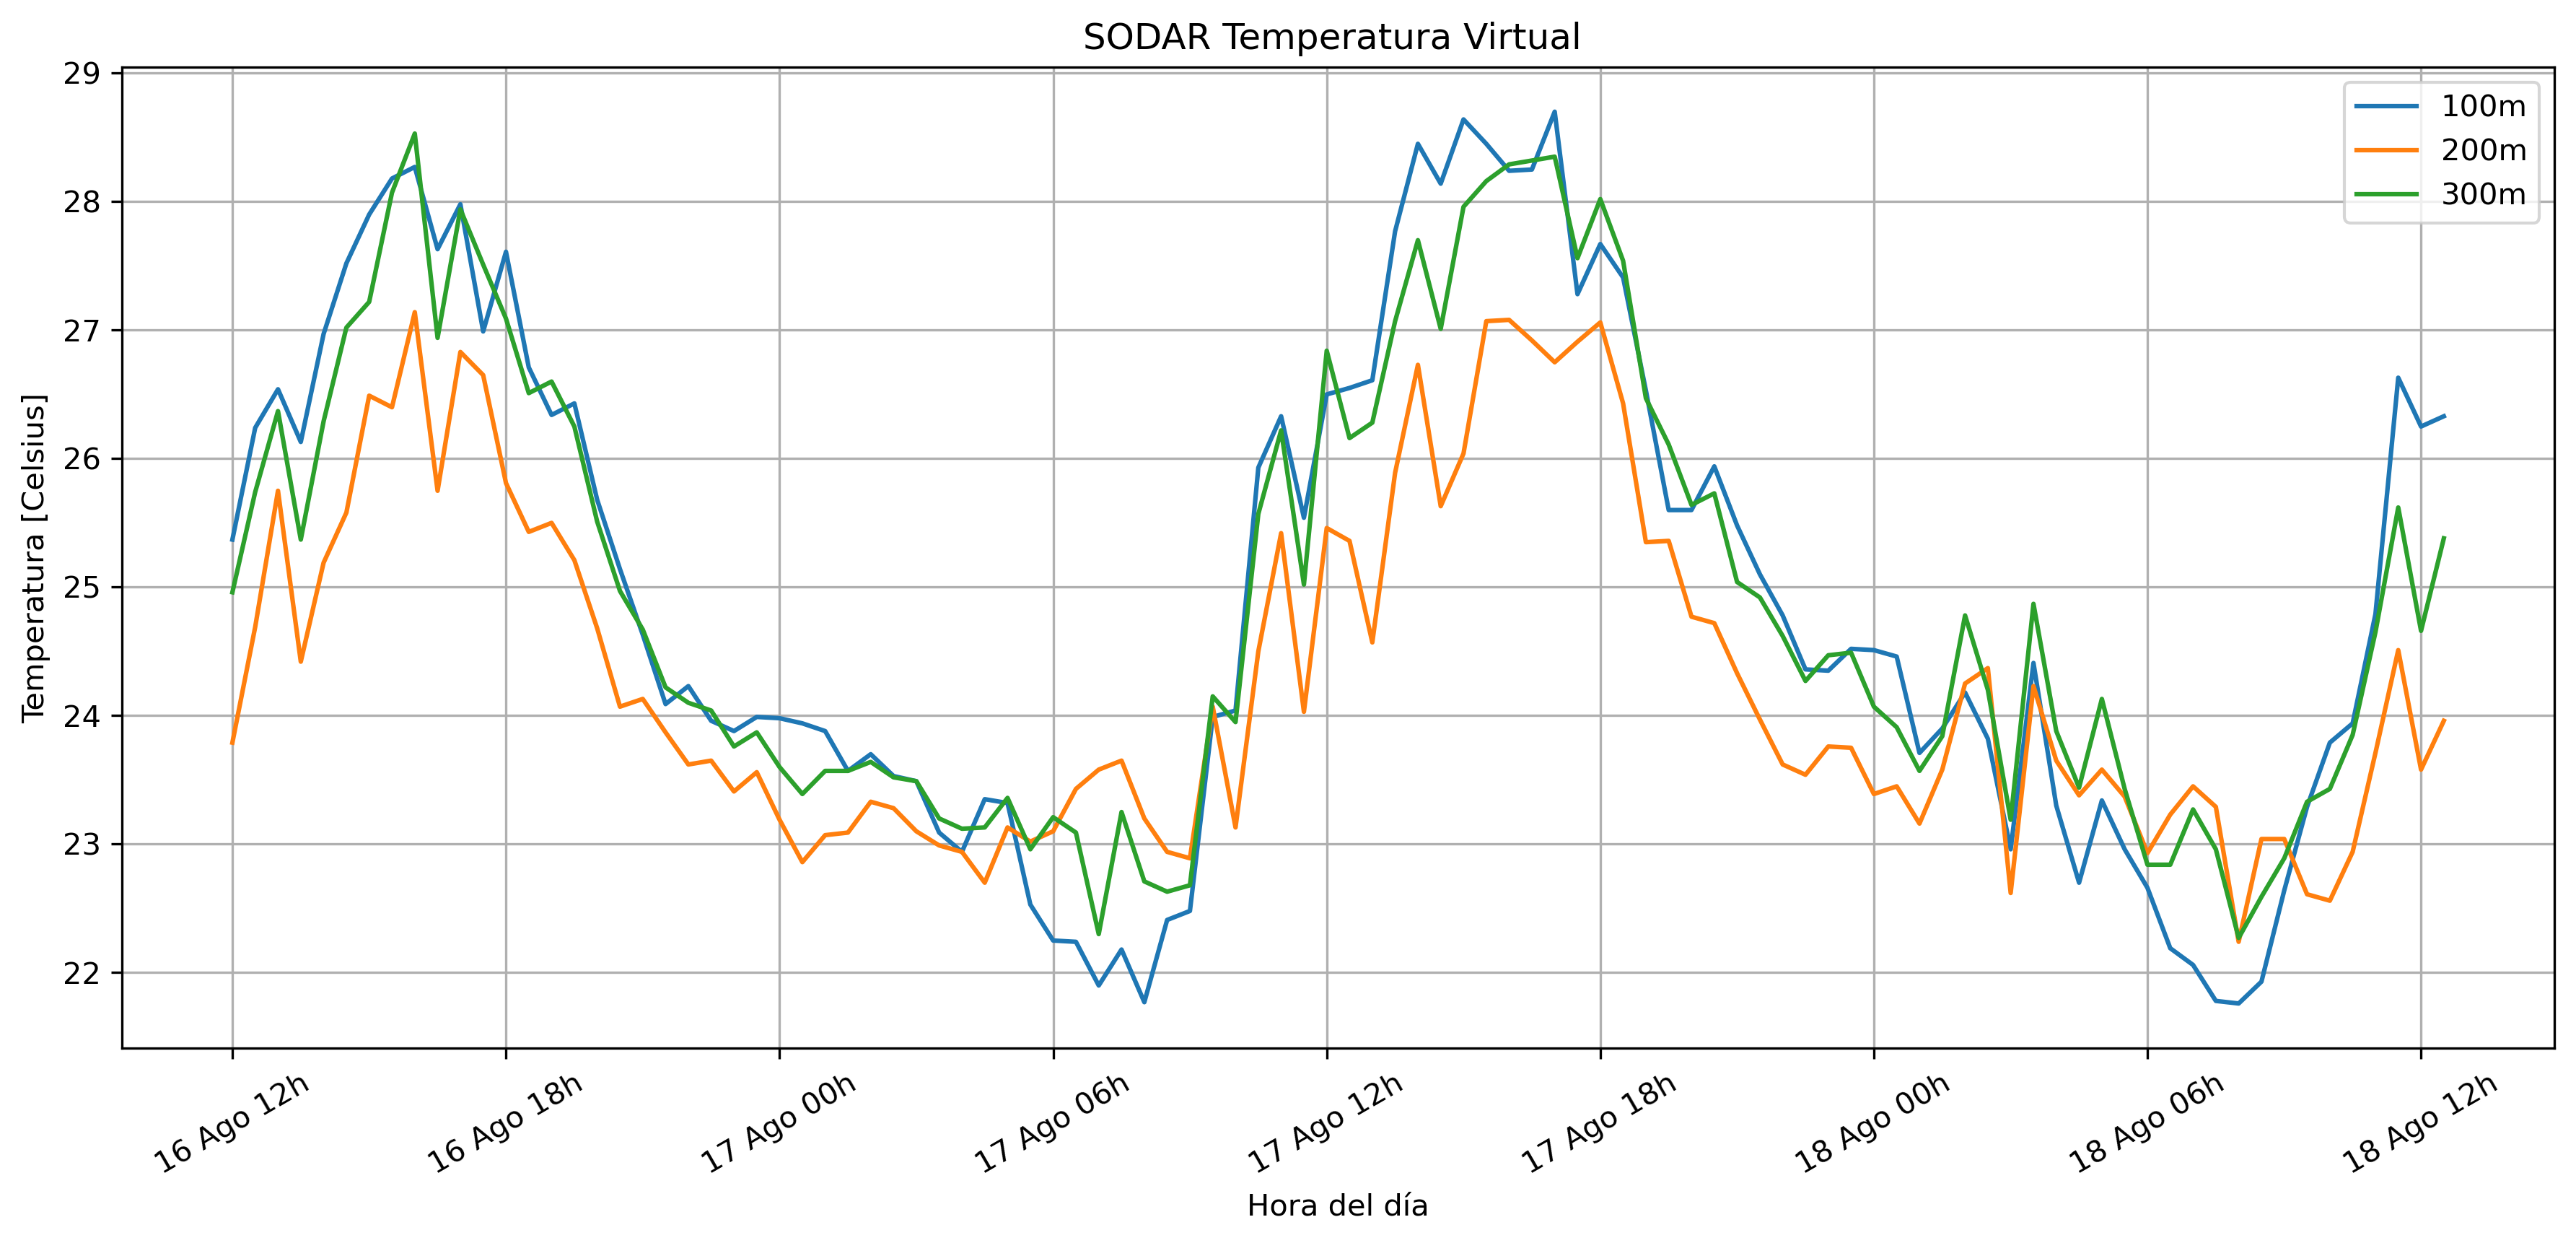

In [92]:
import pandas as pd
fig = plt.figure(figsize=[14.5,6])
s100 = tv['spd_100'][date1:date2]
s200 = tv['spd_300'][date1:date2]
s300 = tv['spd_200'][date1:date2]

nx = s50.size
xdelta = 6
xloc = np.arange(nx)
plt.xticks(np.arange(nx)[::xdelta*2], s50[::xdelta*2].index.strftime('%d Ago %Hh').tolist(), rotation=30);

plt.plot(xloc, s100, label='100m')
plt.plot(xloc, s200, label='200m')
plt.plot(xloc, s300, label='300m')

plt.ylabel('Temperatura [Celsius]')
plt.xlabel('Hora del día')
plt.grid(True)
plt.legend()
#xdelta = 12
#xloc, xindex = np.arange(0,sp_vert.shape[1],xdelta), sp['spd_50'][date1:date2][::xdelta].index
#plt.xticks(xloc, xindex, rotation=30)

plt.title('SODAR Temperatura Virtual ')
figname='wrf_spd_'
#plt.savefig(dirs+figname+'_'+rtimes+'_'+run+'.png', dpi=300)
plt.show()

In [93]:
## SEA BREEZE

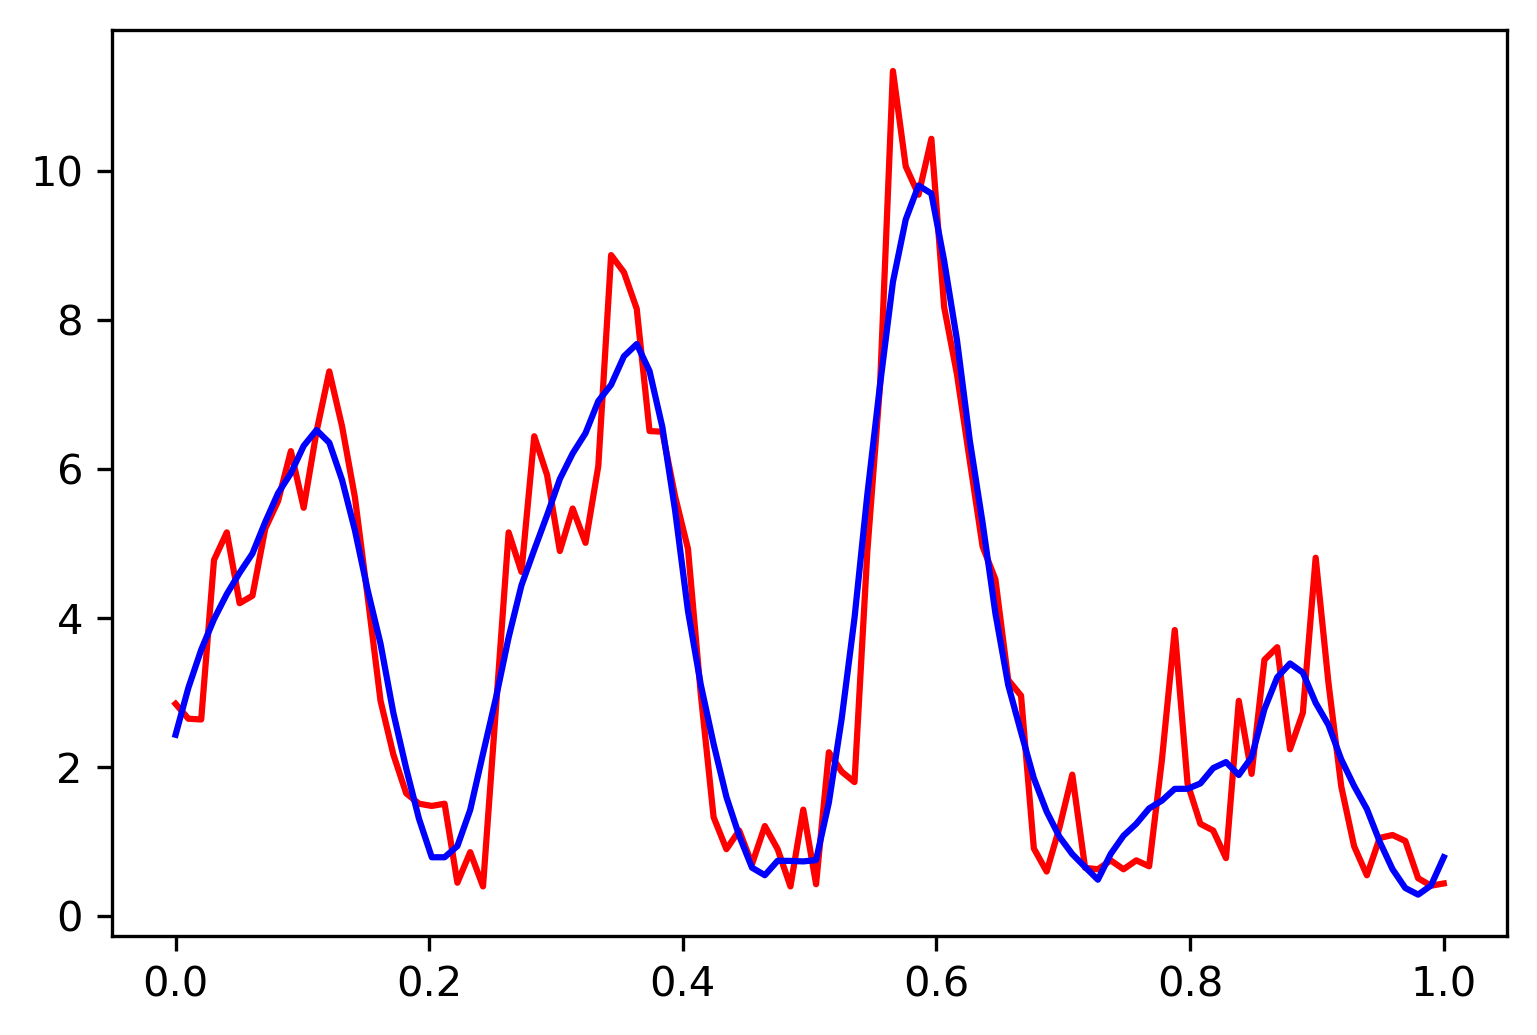

In [94]:
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

#DataFrame.between_time(start_time, end_time, include_start=True, include_end=True, axis=None)
sb = sp.between_time('12:00', '00:00')
db = dd.between_time('12:00', '00:00')
sb.shape

#raw data
data = sb.iloc[:100,2]

x = np.linspace(0,1,100)
y = data.values
#f = interp1d(x, y, kind='cubic')
f = savgol_filter(y, 13, 3) 

plt.plot(x,y, color='red')
plt.plot(x,f, color='blue')
plt.show()

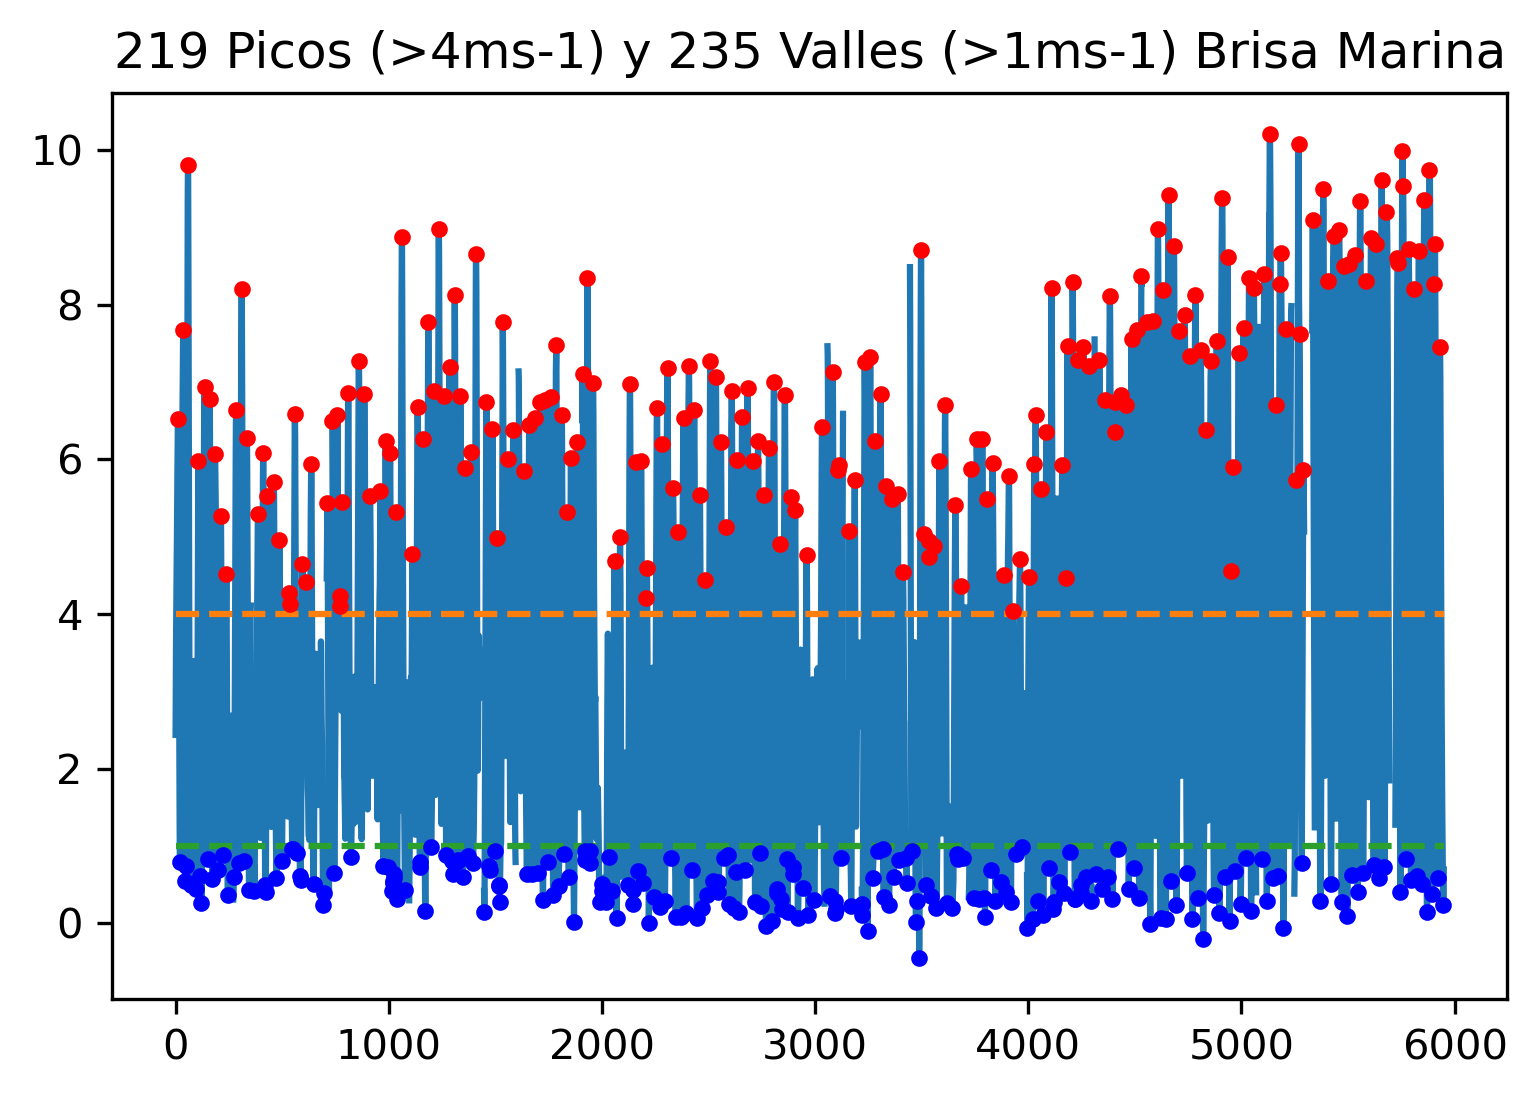

219 235


In [95]:
#python count number of peaks
#https://stackoverflow.com/questions/50756793/peak-detection-algorithm-in-python
    
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

# Input signal
data = sb.iloc[:,2]
t = np.arange(data.size)
#series = data.values
series = savgol_filter(data, 13, 3) 

# Threshold value (for height of peaks and valleys)
hthresh = 4
lthresh = 1

# Find indices of peaks
peak_idx, _ = find_peaks(series, height=hthresh)

# Find indices of valleys (from inverting the signal)
valley_idx, _ = find_peaks(-series, height=-lthresh)

# Plot signal
plt.plot(t, series)

# Plot threshold
plt.plot([min(t), max(t)], [hthresh, hthresh], '--')
plt.plot([min(t), max(t)], [lthresh, lthresh], '--')

# Plot peaks (red) and valleys (blue)
plt.plot(t[peak_idx], series[peak_idx], 'r.')
plt.plot(t[valley_idx], series[valley_idx], 'b.')

plt.title(str(peak_idx.size)+' Picos (>4ms-1) y '+str(valley_idx.size)+' Valles (>1ms-1) Brisa Marina')

plt.show()

print(peak_idx.size, valley_idx.size)


In [96]:
!conda install -c conda-forge windrose


Solving environment: ...working... done

# All requested packages already installed.



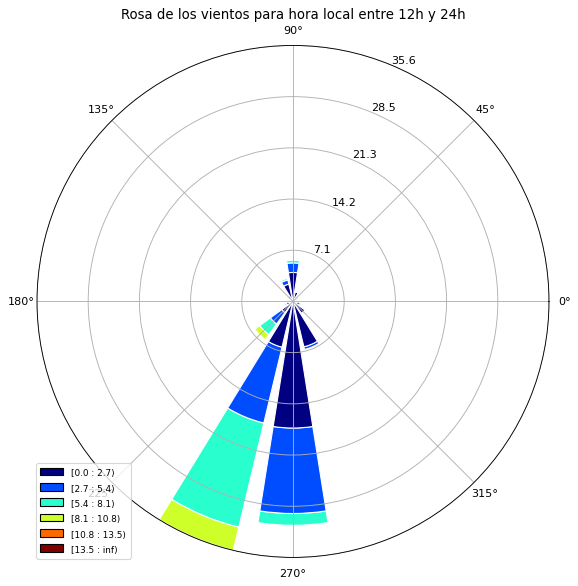

In [97]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
# Create wind speed and direction variables

ws = sb.iloc[:,2]   #np.random.random(500) * 6
wd = db.iloc[:,2]   #np.random.random(500) * 360

#ax.set_xlabel('Performance')

ax = WindroseAxes.from_ax()
ax.set_title('Rosa de los vientos para hora local entre 12h y 24h')

ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

201


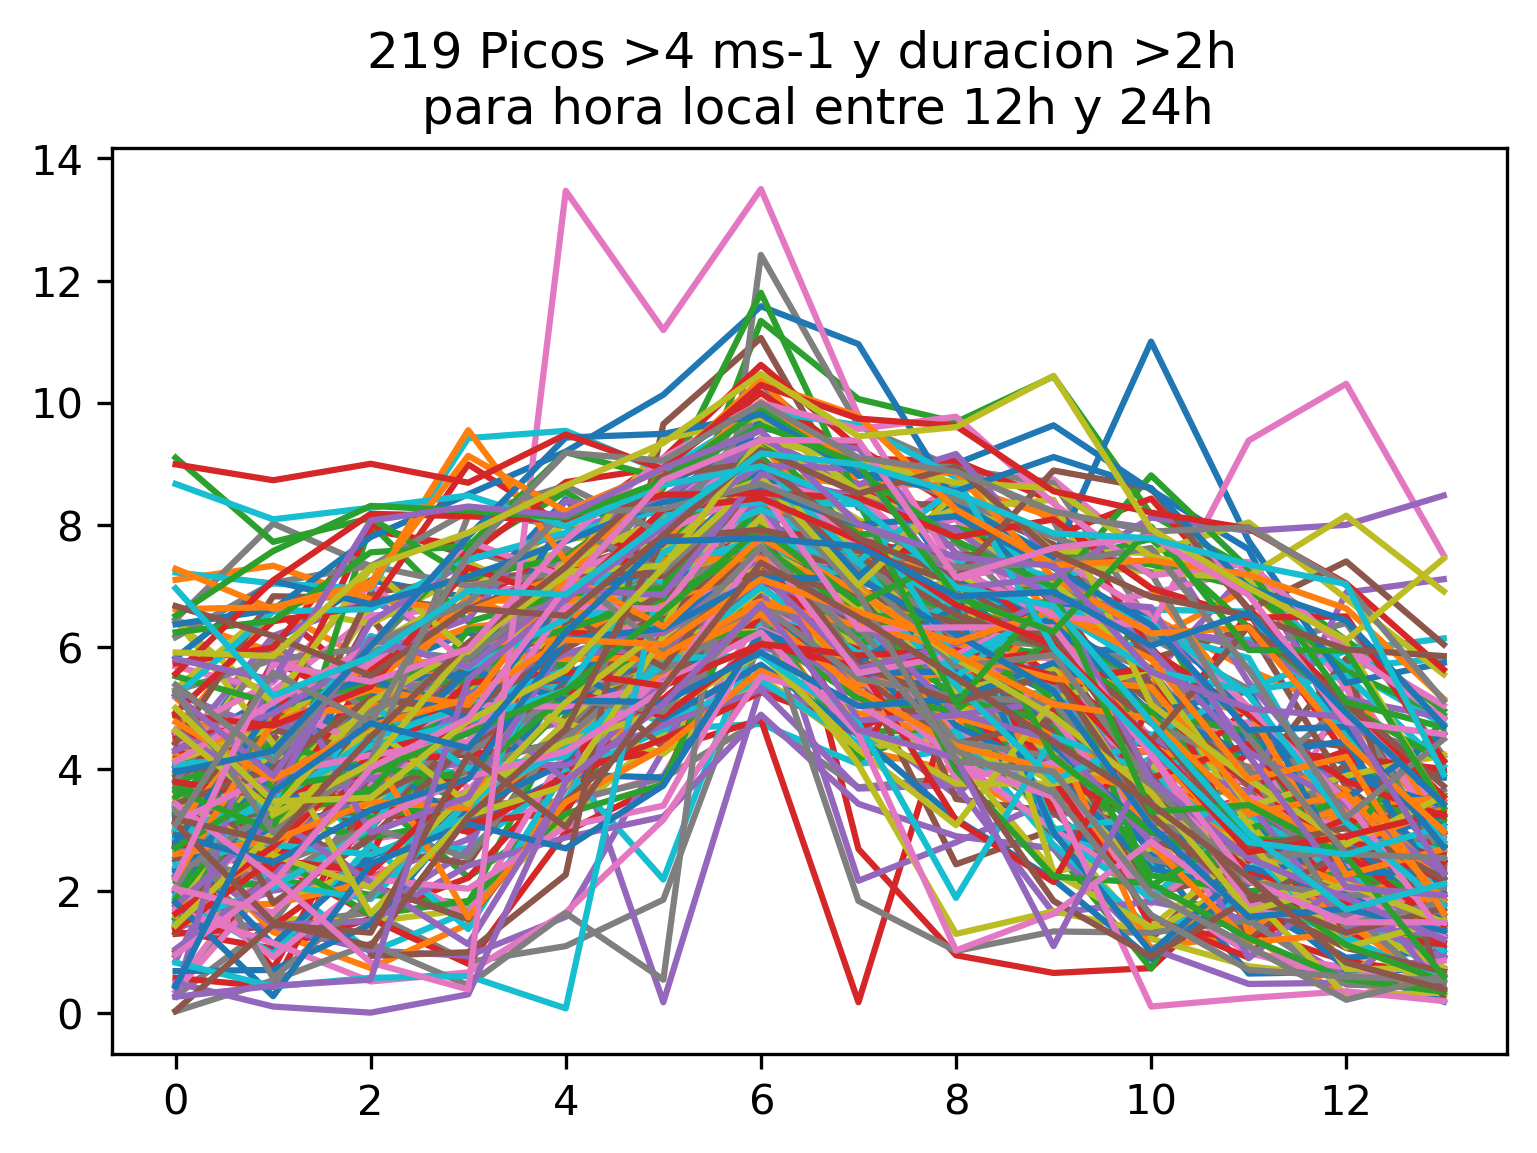

In [98]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
xx = sb.iloc[:,2].values
peaks, properties = find_peaks(xx, prominence=4, width=4)
print(peaks.size)

plt.title(str(peak_idx.size)+' Picos >4 ms-1 y duracion >2h \n para hora local entre 12h y 24h')
for i in range(peaks.size):
    plt.plot(xx[peaks[i]-6:peaks[i]+8])

<AxesSubplot:>

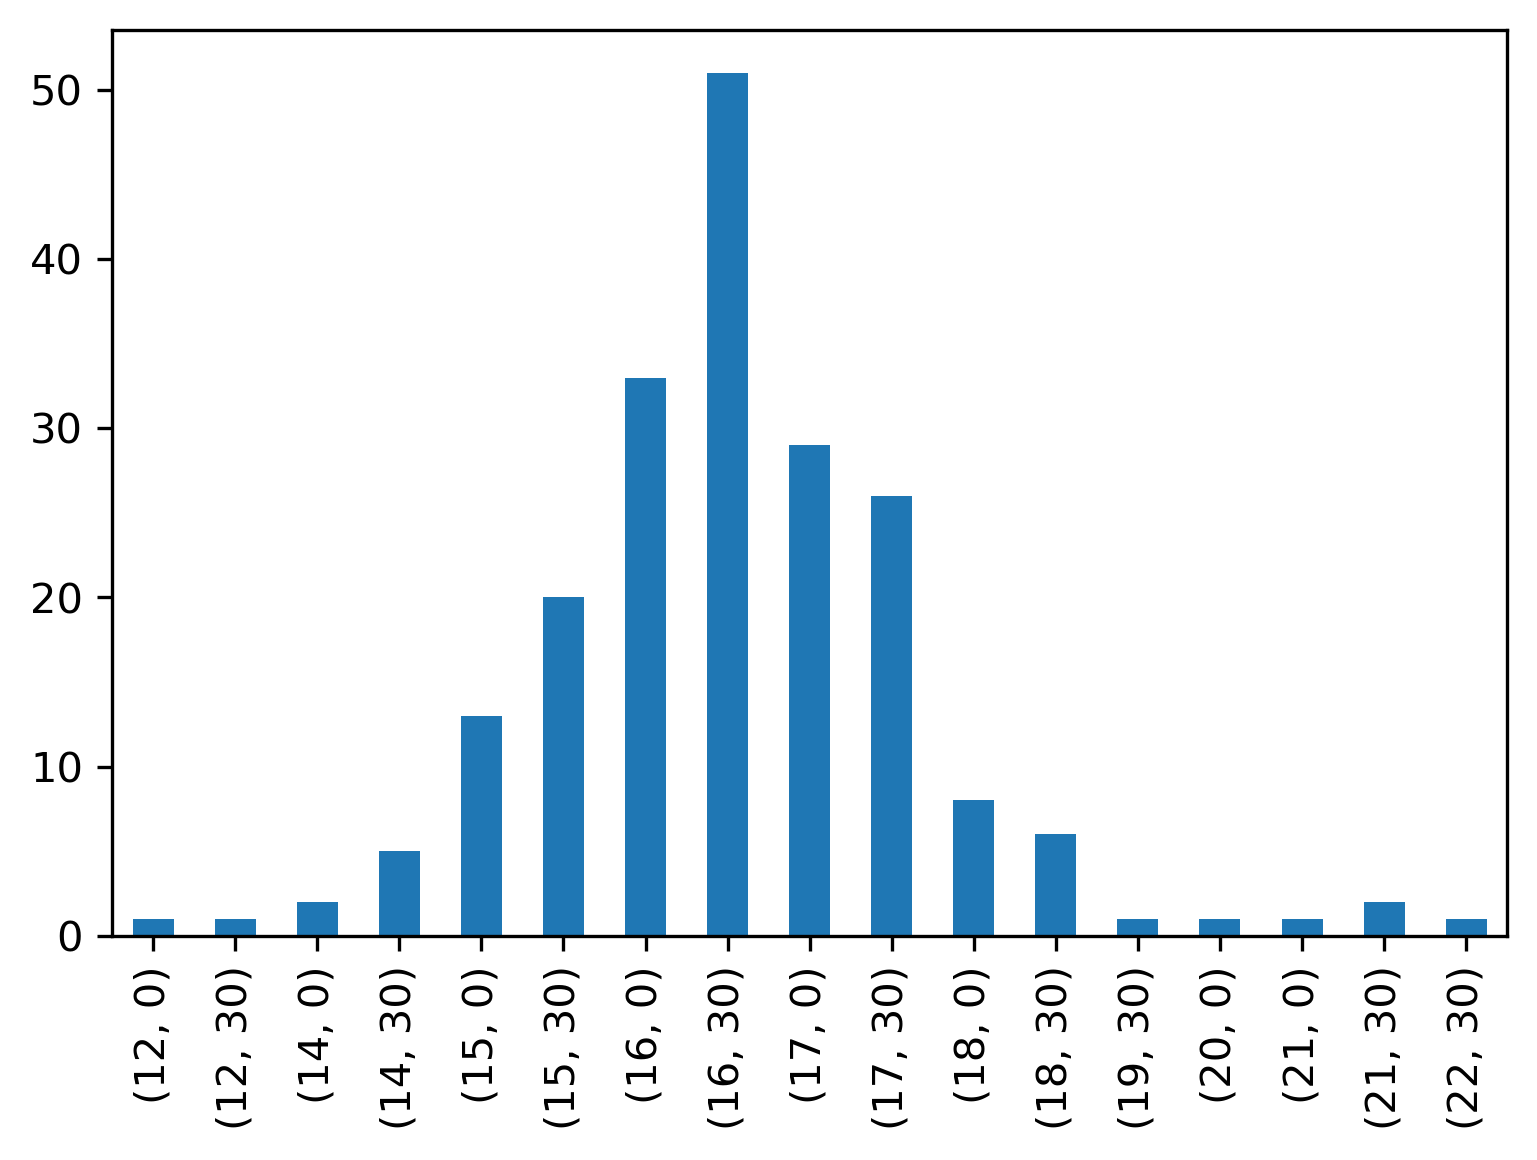

In [99]:
# https://stackoverflow.com/questions/27365467/can-pandas-plot-a-histogram-of-dates

tp = sb.iloc[peaks,2] #.grouby[index.hour].count()
tp.groupby([tp.index.hour, tp.index.minute]).count().plot(kind="bar")

Text(0.5, 1.0, '219 Picos >4 ms-1 y duracion >2h \n para hora local entre 12h y 24h')

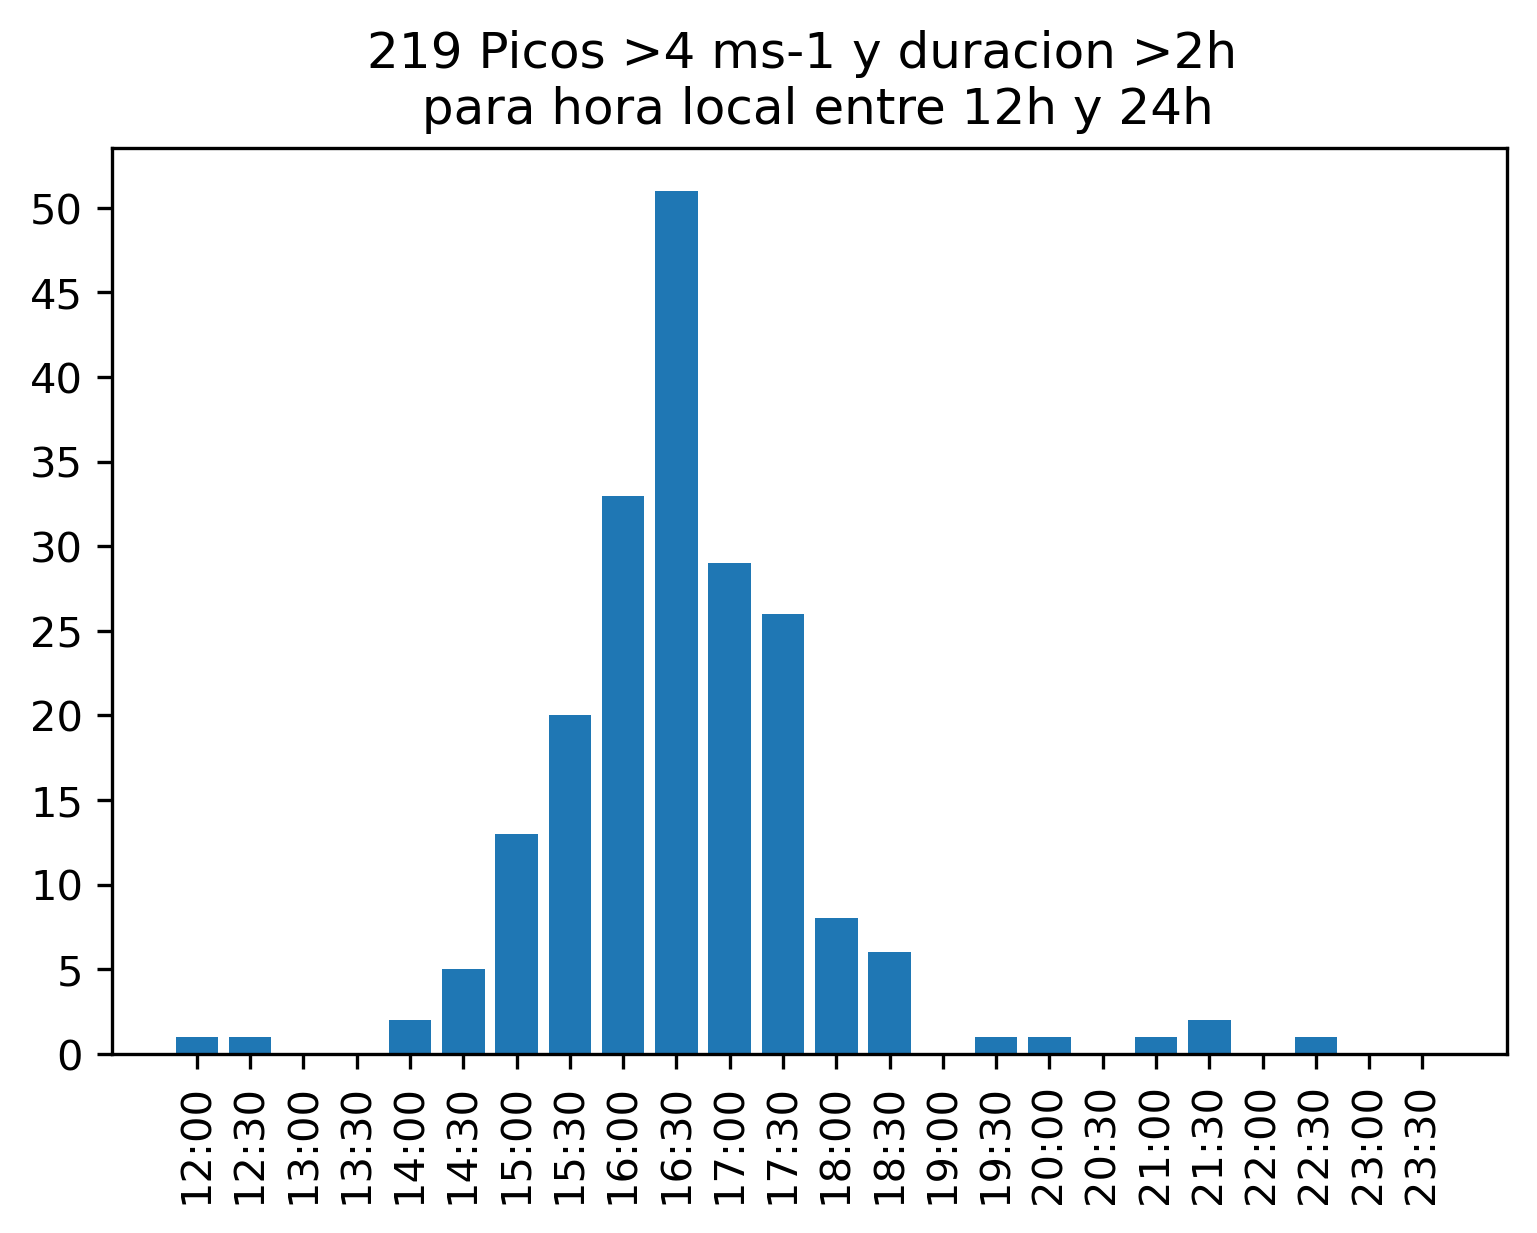

In [100]:
nbar = [ 1,  1,  0, 0, 2,  5, 13, 20, 33, 51, 29, 26,  8,  6,  0, 1,  1,  0,  1,  2,  0,  1, 0, 0]
date_list = ['12:00', '12:30', '13:00', '13:30', '14:00', '14:30', '15:00', '15:30', '16:00', '16:30', '17:00', '17:30', \
            '18:00', '18:30', '19:00', '19:30', '20:00', '20:30', '21:00', '21:30', '22:00', '22:30', '23:00', '23:30' ]

plt.bar(range(24), nbar)
plt.xticks(range(24), date_list, rotation=90);
plt.yticks(range(0, 51, 5))
tp.groupby([tp.index.hour, tp.index.minute]).count().values
plt.title(str(peak_idx.size)+' Picos >4 ms-1 y duracion >2h \n para hora local entre 12h y 24h')


201


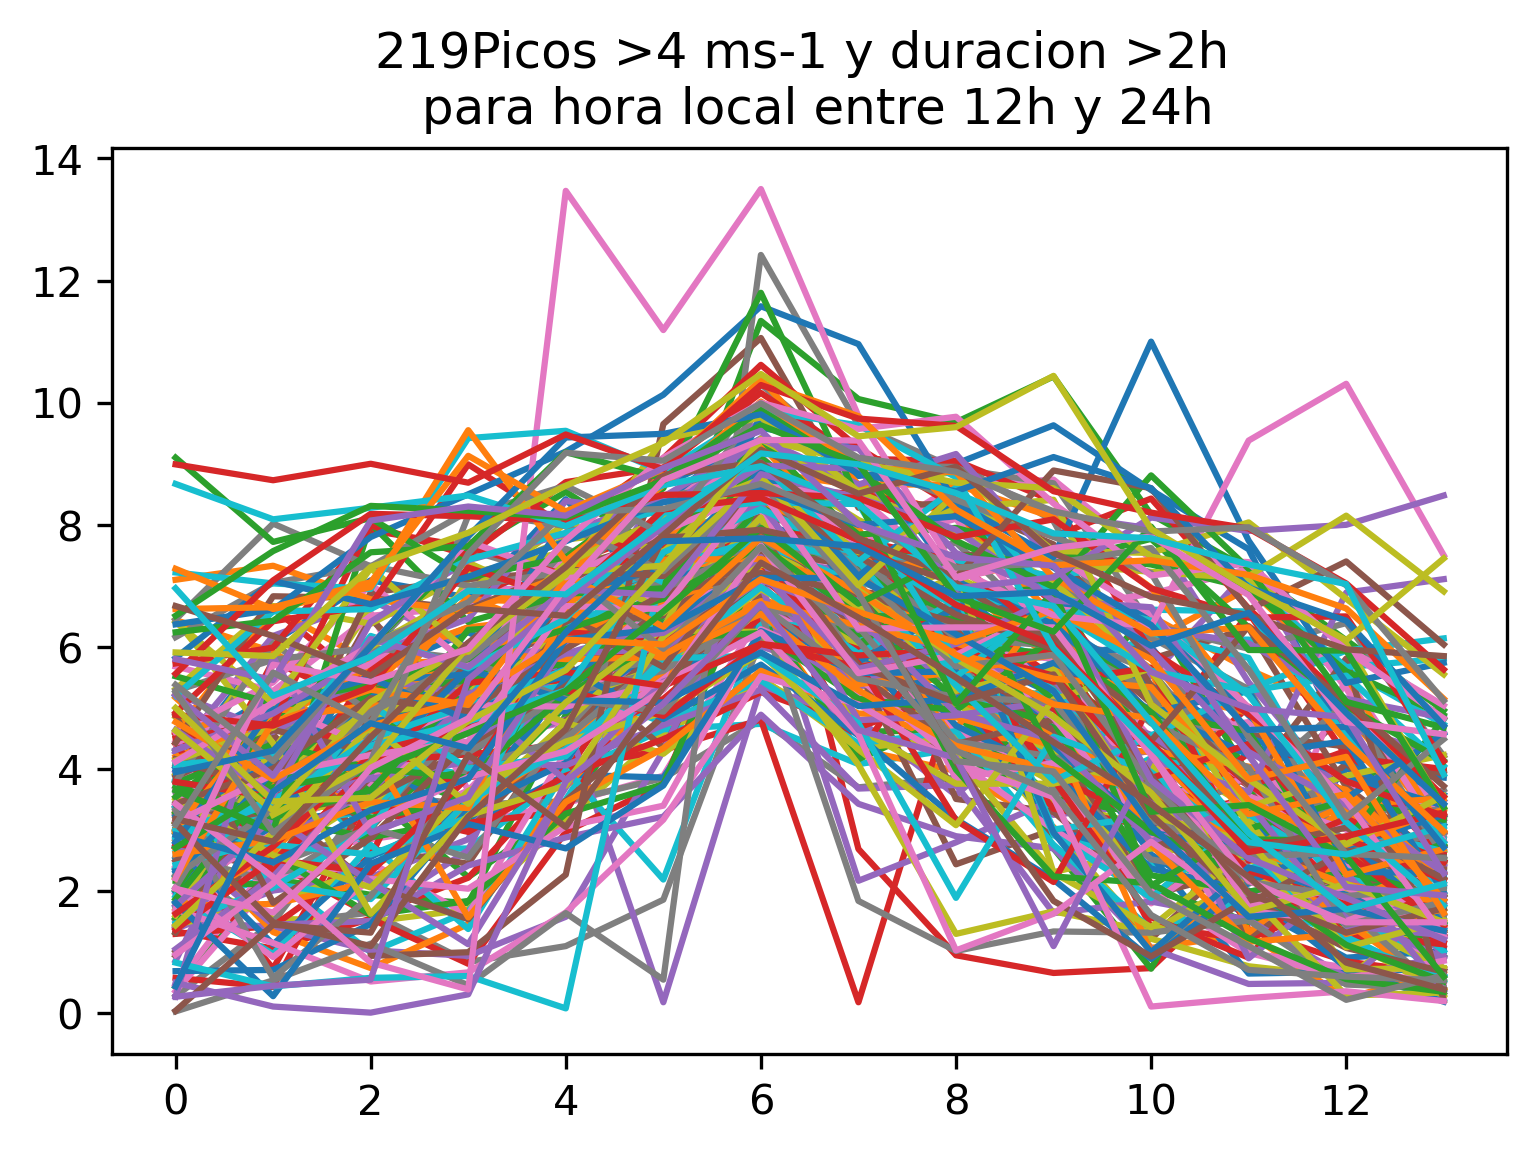

In [101]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
xx = sb.iloc[:,2].values
peaks, properties = find_peaks(xx, prominence=4, width=4)
print(peaks.size)

plt.title(str(peak_idx.size)+'Picos >4 ms-1 y duracion >2h \n para hora local entre 12h y 24h')
for i in range(peaks.size):
    plt.plot(xx[peaks[i]-6:peaks[i]+8])

1.2285555954148975 1 3.5599598163474844 0


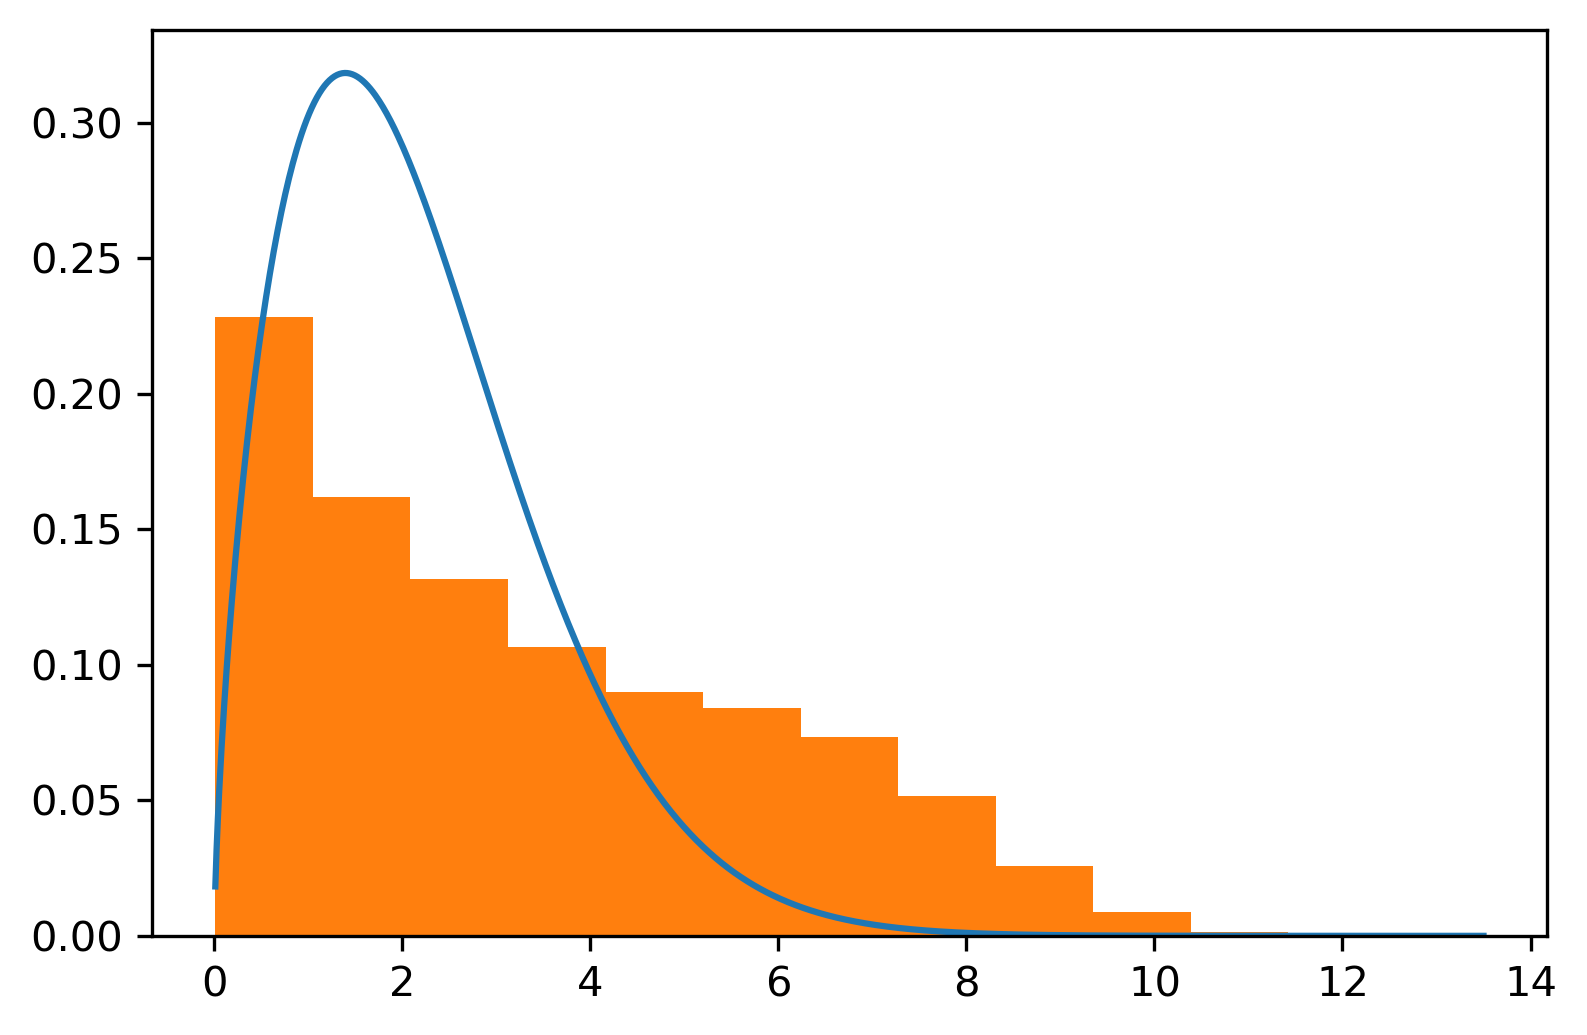

In [102]:
import scipy.stats as s
import numpy as np
import matplotlib.pyplot as plt

def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)

xx = sb.iloc[:,2].values
data = xx[~np.isnan(xx)]

norm = np.linalg.norm(data)
normal_array = data/norm
normal_array

(l, loc, s, scale) = s.exponweib.fit(data, floc=0, f0=1)
print(loc, l, scale, s)

x = np.linspace(data.min(), data.max(), 1000)
plt.plot(x, weib(x, loc+1.2, scale-1.9))
plt.hist(data, int(data.max()), density='true')
plt.show()

In [103]:
## LOW LEVEL JET

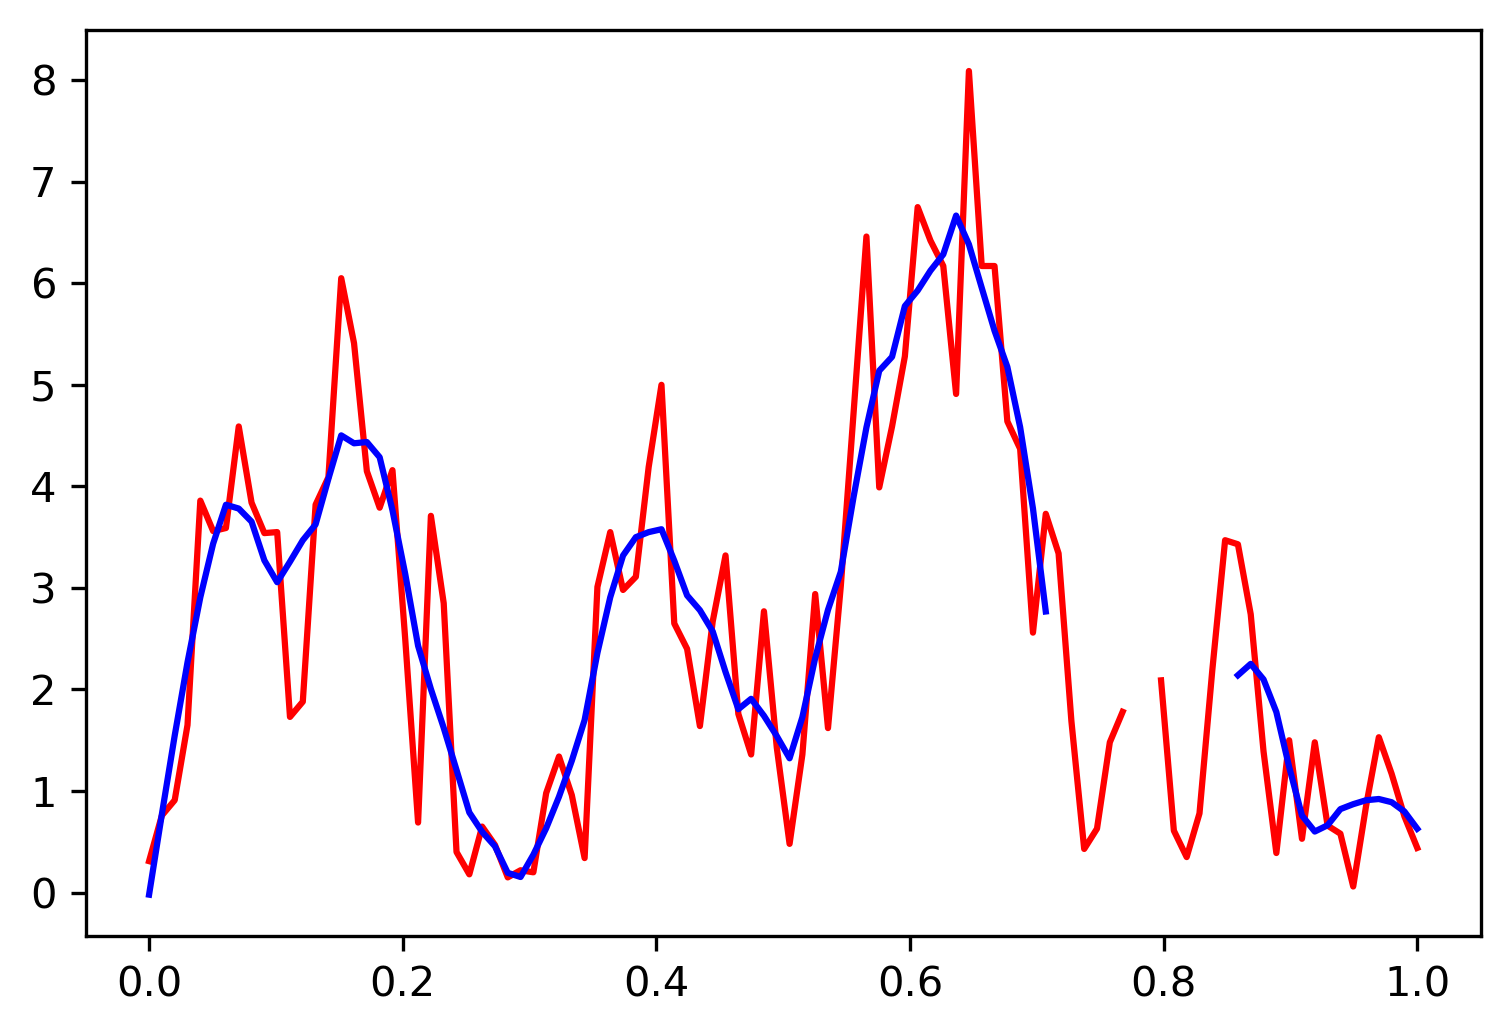

In [104]:
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

#DataFrame.between_time(start_time, end_time, include_start=True, include_end=True, axis=None)
lj = sp.between_time('00:00', '12:00')
dj = dd.between_time('00:00', '12:00')
lj.shape

#raw data
data = lj.iloc[:100,2]

x = np.linspace(0,1,100)
y = data.values
#f = interp1d(x, y, kind='cubic')
f = savgol_filter(y, 13, 3) 

plt.plot(x,y, color='red')
plt.plot(x,f, color='blue')
plt.show()

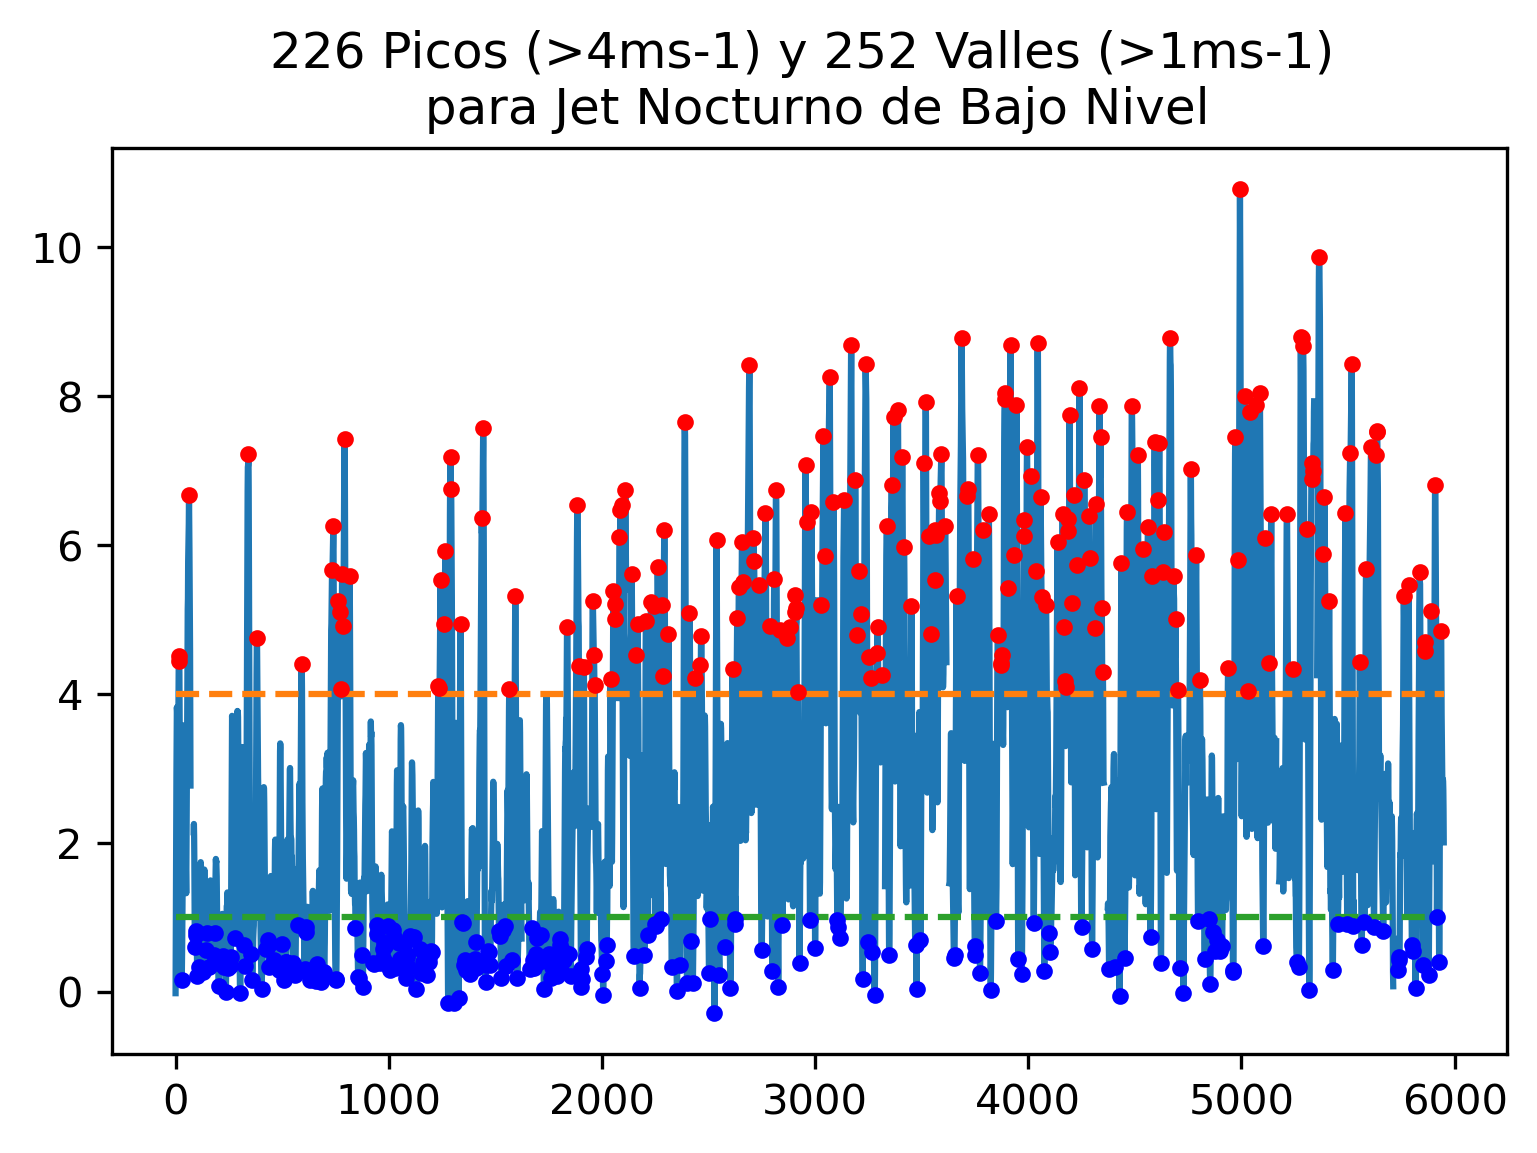

226 252


In [105]:
#python count number of peaks
#https://stackoverflow.com/questions/50756793/peak-detection-algorithm-in-python
    
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

# Input signal
data = lj.iloc[:,2]
t = np.arange(data.size)
#series = data.values
series = savgol_filter(data, 13, 3) 

# Threshold value (for height of peaks and valleys)
hthresh = 4
lthresh = 1

# Find indices of peaks
peak_idx, _ = find_peaks(series, height=hthresh)

# Find indices of valleys (from inverting the signal)
valley_idx, _ = find_peaks(-series, height=-lthresh)

# Plot signal
plt.plot(t, series)

# Plot threshold
plt.plot([min(t), max(t)], [hthresh, hthresh], '--')
plt.plot([min(t), max(t)], [lthresh, lthresh], '--')

# Plot peaks (red) and valleys (blue)
plt.plot(t[peak_idx], series[peak_idx], 'r.')
plt.plot(t[valley_idx], series[valley_idx], 'b.')

plt.title(str(peak_idx.size)+' Picos (>4ms-1) y '+str(valley_idx.size)+' Valles (>1ms-1) \n para \
Jet Nocturno de Bajo Nivel')

plt.show()

print(peak_idx.size, valley_idx.size)


<AxesSubplot:>

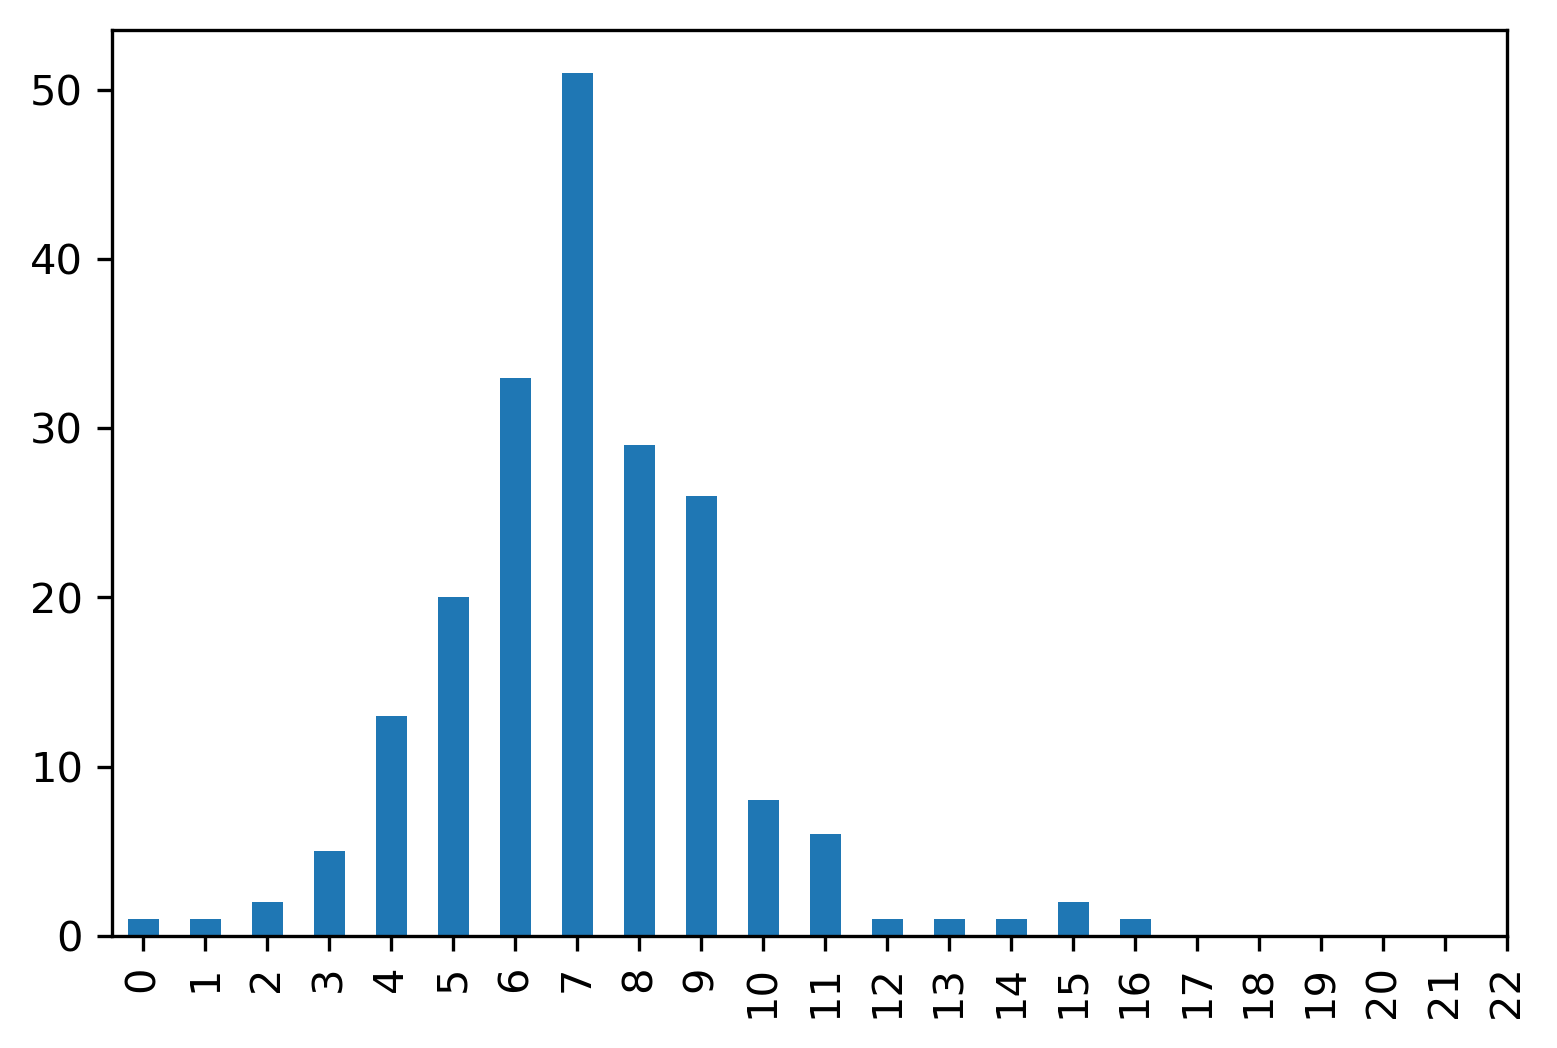

In [106]:
# https://stackoverflow.com/questions/27365467/can-pandas-plot-a-histogram-of-dates

tp = lj.iloc[peaks,2] #.grouby[index.hour].count()
tp.groupby([tp.index.hour, tp.index.minute]).count().plot(kind="bar", xticks=range(23), x=date_list)

In [107]:
tp.groupby([tp.index.hour, tp.index.minute]).count()

0   30     1
1   0      1
2   30     2
3   0      5
    30    13
4   0     20
    30    33
5   0     51
    30    29
6   0     26
    30     8
7   0      6
8   0      1
    30     1
9   30     1
10  0      2
11  0      1
Name: spd_50, dtype: int64

In [108]:
tp.groupby([tp.index.hour, tp.index.minute]).count()[1]

0    1
Name: spd_50, dtype: int64

In [109]:
(tp.groupby([tp.index.hour, tp.index.minute]).count().values).tolist()

[1, 1, 2, 5, 13, 20, 33, 51, 29, 26, 8, 6, 1, 1, 1, 2, 1]

Text(0.5, 1.0, '226 Picos >4 ms-1 y duracion >2h \n para hora local entre 0h y 12h')

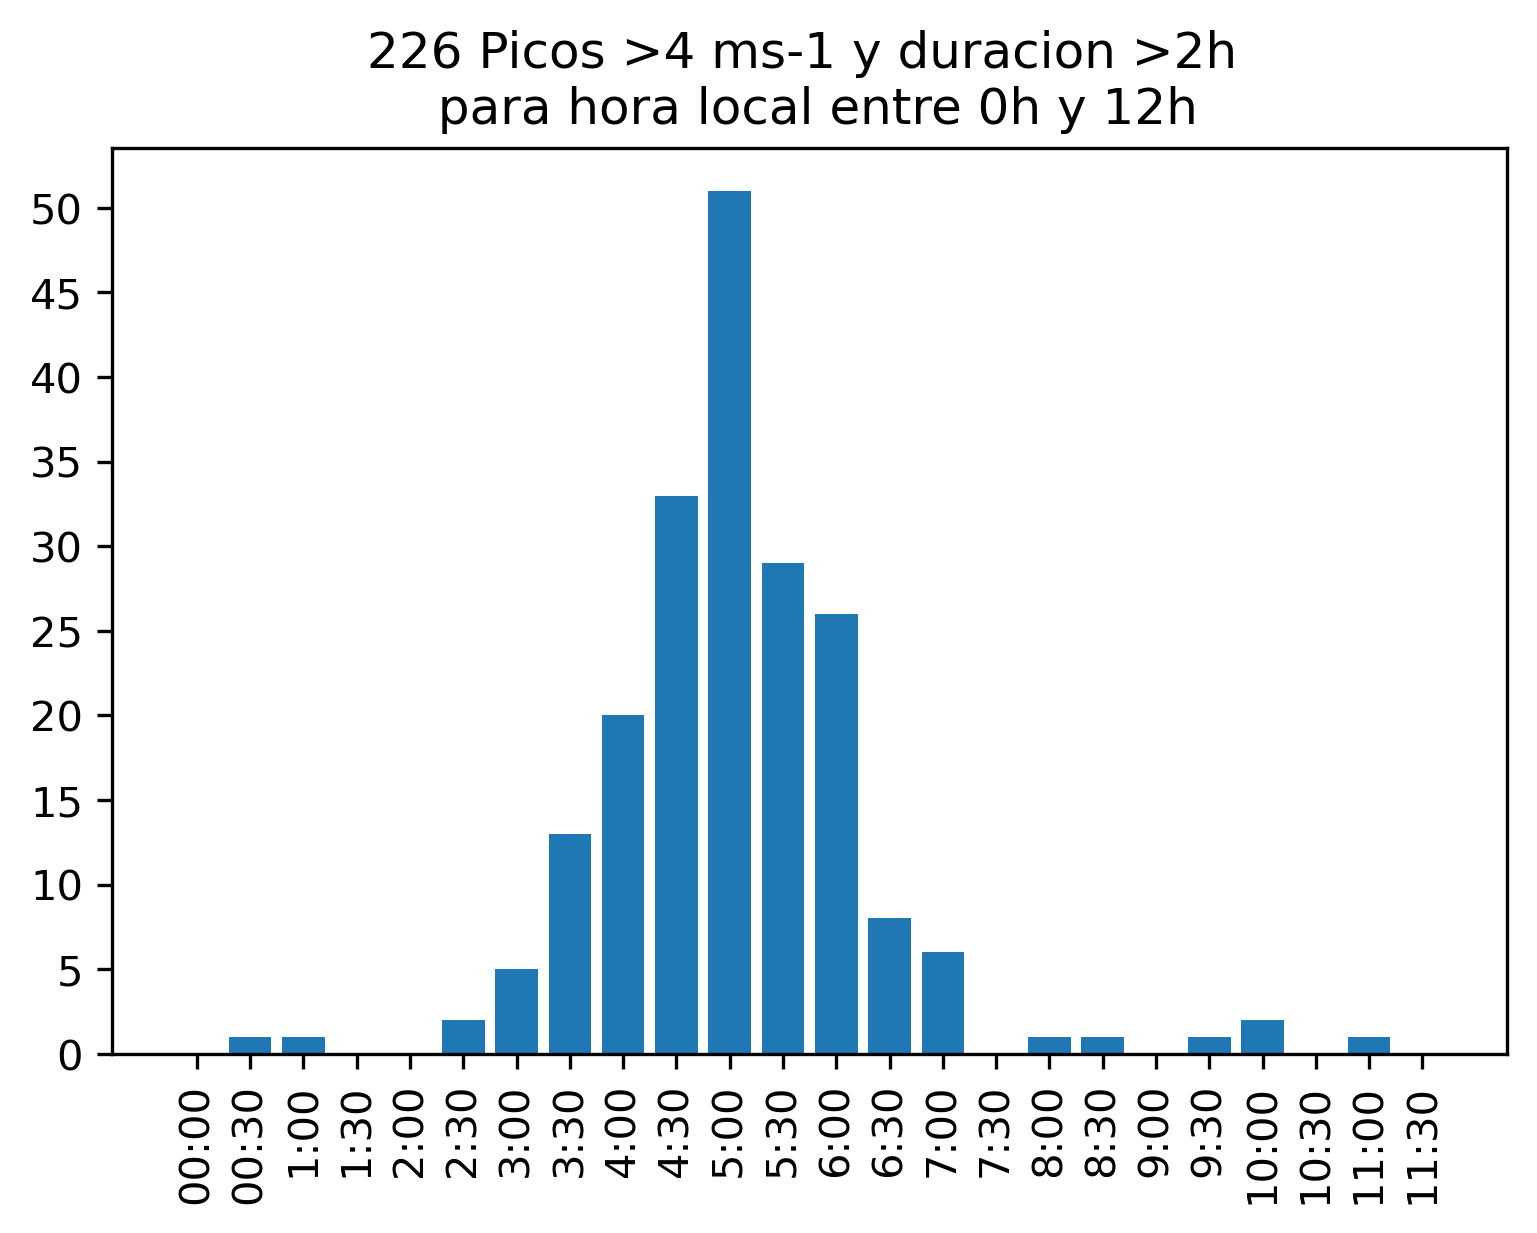

In [110]:
date_list = ['00:00', '00:30', '1:00', '1:30', '2:00', '2:30', '3:00', '3:30', '4:00', '4:30', '5:00', '5:30', \
            '6:00', '6:30', '7:00', '7:30', '8:00', '8:30', '9:00', '9:30', '10:00', '10:30', '11:00', '11:30' ]

nbar = [ 0, 1, 1, 0, 0, 2, 5, 13, 20, 33, 51, 29, 
        26, 8, 6, 0, 1, 1, 0, 1, 2, 0, 1, 0]

plt.bar(range(24), nbar)
plt.xticks(range(24), date_list, rotation=90);
plt.yticks(range(0, 55, 5))
tp.groupby([tp.index.hour, tp.index.minute]).count().values
plt.title(str(peak_idx.size)+' Picos >4 ms-1 y duracion >2h \n para hora local entre 0h y 12h')


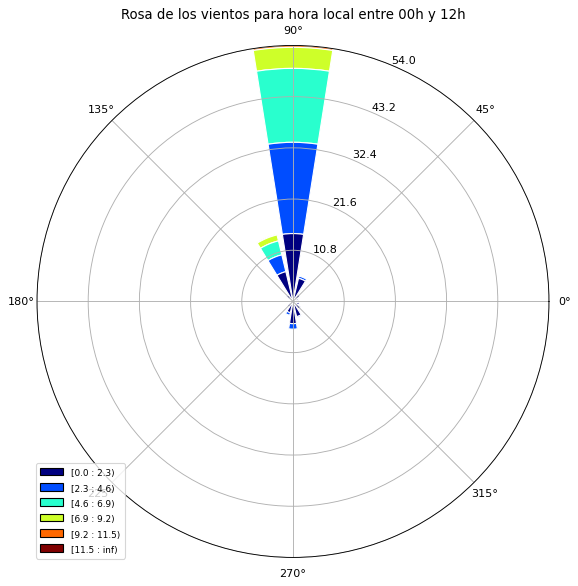

In [111]:
# Create wind speed and direction variables

ws = lj.iloc[:,2]   #np.random.random(500) * 6
wd = dj.iloc[:,2]   #np.random.random(500) * 360

ax = WindroseAxes.from_ax()
ax.set_title('Rosa de los vientos para hora local entre 00h y 12h')
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

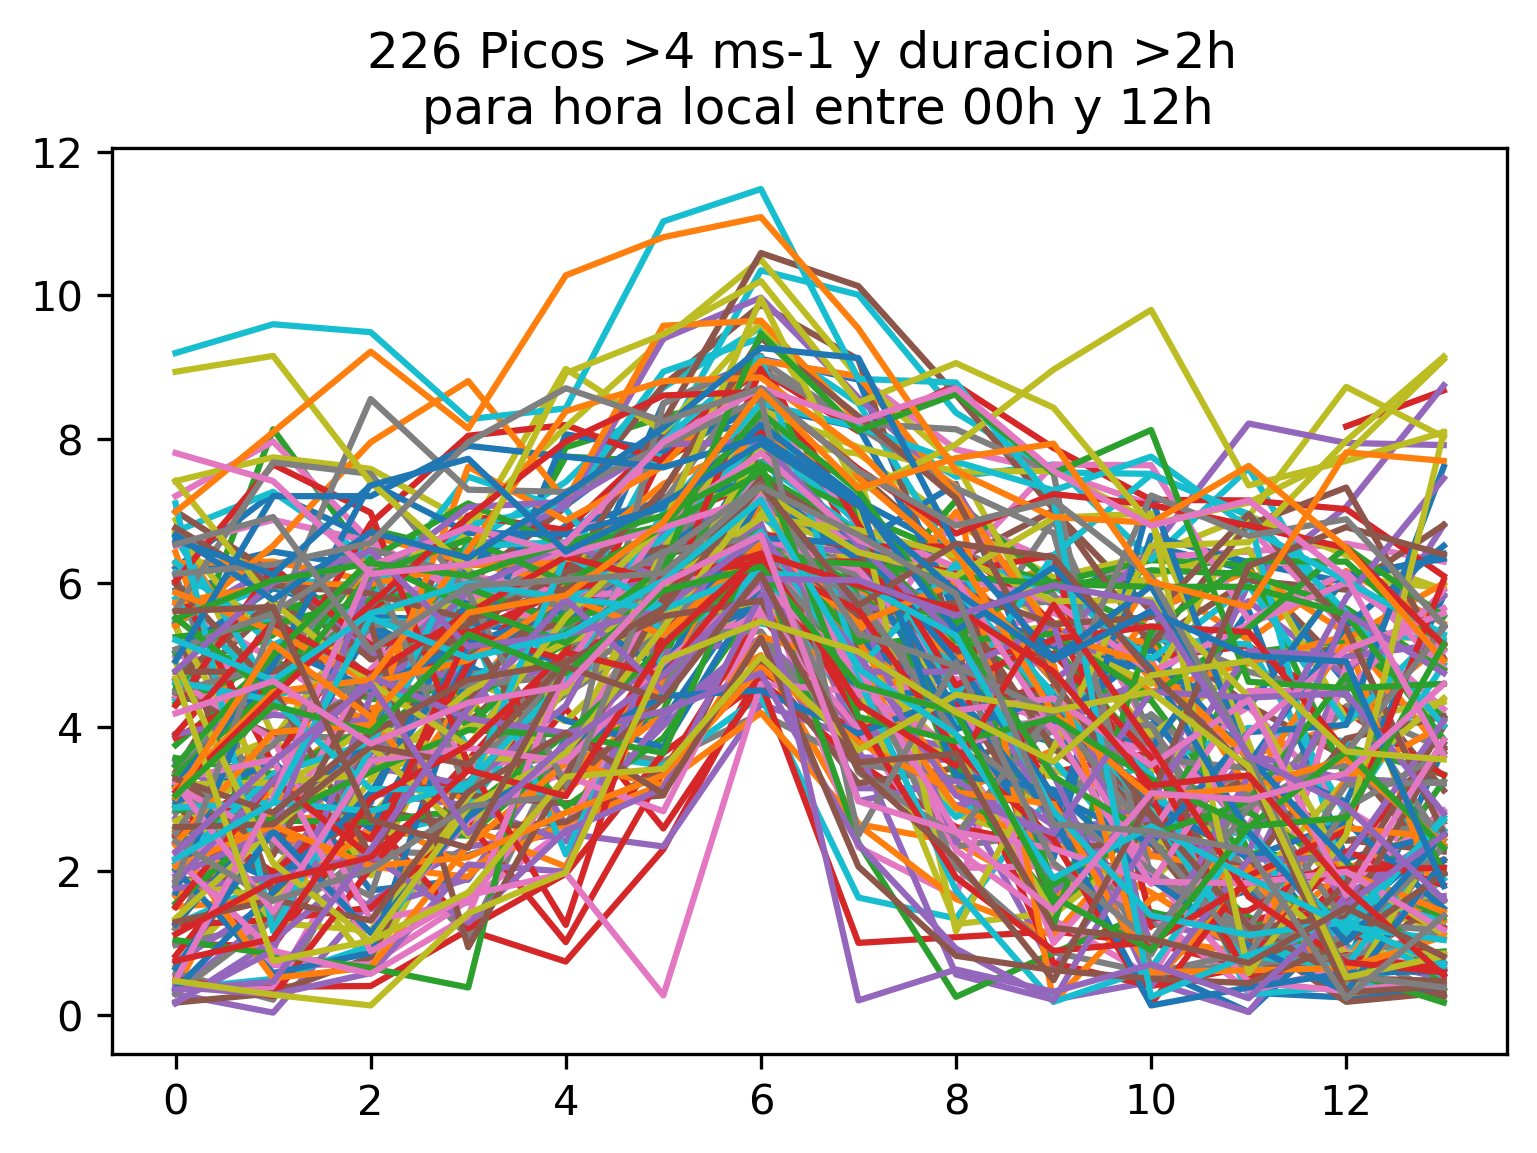

In [112]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
xx = lj.iloc[:,2].values
peaks, properties = find_peaks(xx, prominence=4, width=4)
peaks.size

plt.title(str(peak_idx.size)+' Picos >4 ms-1 y duracion >2h \n para hora local entre 00h y 12h')
for i in range(peaks.size):
    plt.plot(xx[peaks[i]-6:peaks[i]+8])

1.1498597402261006 1 3.042559591689134 0


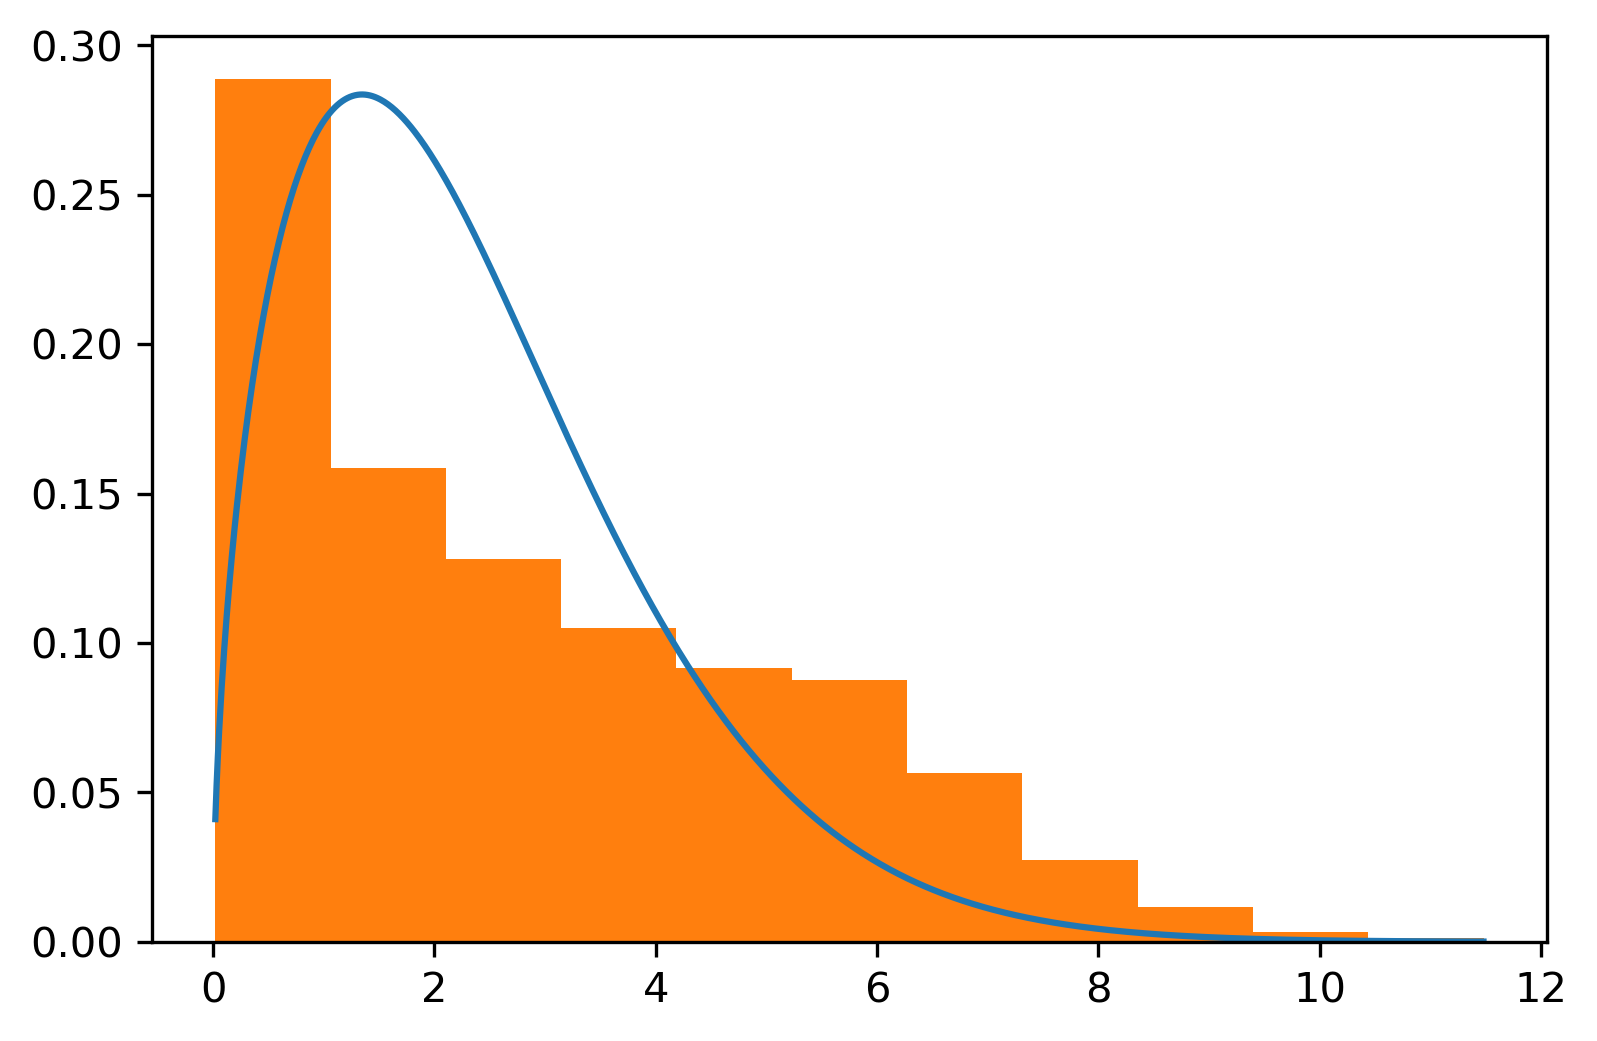

In [113]:
import scipy.stats as s
import numpy as np
import matplotlib.pyplot as plt

def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)

xx = lj.iloc[:,2].values
data = xx[~np.isnan(xx)]

norm = np.linalg.norm(data)
normal_array = data/norm
normal_array

(l, loc, s, scale) = s.exponweib.fit(data, floc=0, f0=1)
print(loc, l, scale, s)

x = np.linspace(data.min(), data.max(), 1000)
plt.plot(x, weib(x, loc+1.5, scale-1.5))
plt.hist(data, int(data.max()), density='true')
plt.show()